<details>
  <summary>Table of Contents</summary>

# Table of Contents

1. [Extract Data from SQL SERVER](#section1)
2. [Feature Engineering](#section2)
    1. [Add Full name to each state](#section2a)
    2. [Add longitude and latitude coordinates to each state](#section2b)
    3. [Categorize Unique Job Titles into Distinct Groups using K Mean](#section2c)
3. [Exploratory Data Analysis (EDA) - Univariate](#section3)
    1. [Numerical Features](#section3a)
    2. [Categorical Features](#section3b)
4. [Exploratory Data Analysis (EDA) - Bivariate/ Multivariate](#section4)
    1. [Profit](#section4a)
    2. [Charged Off Loans](#section4b)
    3. [Interest Rate](#section4c)
    4. [Debt-To-Income](#section4d)
5. [Feature Selection](#section5)
    1. [Chi-Square (Categorical - Categorical)](#section5aa)
    2. [ANOVA (Numerical - Categorical)](#section5ab)
6. [Prepare for Machine learning](#section6)
7. [Machine Learning](#section7)
   1. [Methology](#section7aa)
       1. [SVM](#section7aaa)
       2. [Logistic Regression](#section7aab)
       3. [Gradient Boosting](#section7aac)
       4. [Random Forest](#section7aad)
       5. [Extra Tree](#section7aae)
       6. [XGB](#section7aaf)
       7. [LGM](#section7aag)
       8. [CAT](#section7aah)
       9. [Deep Learning](#section7aai)
   2. [Class Imbalance Techniques](#section7ab)
       1. [Under Sampling (Tomek)](#section7aaa)
       2. [Over Sampling (SMOTE)](#section7aaab) 
8. [Analysis Features](#section8)
9. [Hyper Parameter Tunning - Optuna](#section9)
10. [Convert DataFrame Back into SQL SERVER](#section10)

</details>


In [2]:
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import calendar
import optuna
import joblib

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)

C:\Users\User\anaconda3\envs\py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import sys
print(sys.version)

3.10.14 | packaged by Anaconda, Inc. | (main, Mar 21 2024, 16:20:14) [MSC v.1916 64 bit (AMD64)]


In [4]:
details = ('DRIVER={SQL SERVER};'
           'SERVER=DESKTOP-OEN5051\SQLEXPRESS;'
           'DATABASE=Bank Loan;'
           'Trusted_Connection= yes;')

In [5]:
connection = pyodbc.connect(details)
cursor = connection.cursor()

In [6]:
sql_query = "SELECT * FROM [Bank Loan].[dbo].[financial_loan]"

# 1) Extract Data from SQL SERVER

In [6]:
df = pd.read_sql_query(sql_query, connection)

In [7]:
df.head()

id address_state  emp_length              emp_title grade  \
0  1077430            GA    < 1 year                  RYDER     C   
1  1072053            CA     9 years         MKC ACCOUNTING     E   
2  1069243            CA     4 years  CHEMAT TECHNOLOGY INC     C   
3  1041756            TX    < 1 year    BARNES DISTRIBUTION     B   
4  1068350            IL  10 > years          J&J STEEL INC     A   

  home_ownership  issue_date last_credit_pull_date last_payment_date  \
0           Rent  2021-02-11            2021-09-13        2021-04-13   
1           Rent  2021-01-01            2021-12-14        2021-01-15   
2           Rent  2021-01-05            2021-12-12        2021-01-09   
3       Mortgage  2021-02-25            2021-12-12        2021-03-12   
4       Mortgage  2021-01-01            2021-12-14        2021-01-15   

   loan_status next_payment_date purpose sub_grade       term  annual_income  \
0  Charged Off        2021-05-13     Car        C4  60 months        30000.0   
1   Fully Paid        2021-02-15     Car        E1  36 months        48000.0   
2  Charged Off        2021-02-09     Car        C5  36 months        50000.0   
3   Fully Paid        2021-04-12     Car        B2  60 months        42000.0   
4   Fully Paid        2021-02-15     Car        A1  36 months        83000.0   

      dti  installment  int_rate  loan_amount  total_acc  total_payment  \
0  0.0100    59.830002    0.1527       2500.0          4           1009   
1  0.0535   109.430000    0.1864       3000.0          4           3939   
2  0.2088   421.649994    0.1596      12000.0         11           3522   
3  0.0540    97.059998    0.1065       4500.0          9           4911   
4  0.0231   106.529999    0.0603       3500.0         28           3835   

   Term_Mnths  Profit  Profit_Percent  
0        60.0 -1491.0      -59.640000  
1        36.0   939.0       31.300000  
2        36.0 -8478.0      -70.650000  
3        60.0   411.0        9.133333  
4        36.0   335.0        9.571429

In [11]:
#df = df.dropna()

In [12]:
df.describe()

id  annual_income           dti   installment      int_rate  \
count  3.857600e+04   3.857600e+04  38576.000000  38576.000000  38576.000000   
mean   6.810371e+05   6.964454e+04      0.133274    326.862965      0.120488   
std    2.113246e+05   6.429368e+04      0.066662    209.092000      0.037164   
min    5.473400e+04   4.000000e+03      0.000000     15.690000      0.054200   
25%    5.135170e+05   4.150000e+04      0.082100    168.449997      0.093200   
50%    6.627280e+05   6.000000e+04      0.134200    283.044998      0.118600   
75%    8.365060e+05   8.320050e+04      0.185900    434.442497      0.145900   
max    1.077501e+06   6.000000e+06      0.299900   1305.189941      0.245900   

        loan_amount     total_acc  total_payment    Term_Mnths        Profit  \
count  38576.000000  38576.000000   38576.000000  38576.000000  38576.000000   
mean   11296.066855     22.132544   12263.348533     42.432393    967.281678   
std     7460.746022     11.392282    9051.104777     10.630366   4210.036823   
min      500.000000      2.000000      34.000000     36.000000 -34196.000000   
25%     5500.000000     14.000000    5633.000000     36.000000    362.000000   
50%    10000.000000     20.000000   10042.000000     36.000000   1060.000000   
75%    15000.000000     29.000000   16658.000000     60.000000   2378.250000   
max    35000.000000     90.000000   58564.000000     60.000000  23564.000000   

       Profit_Percent  
count    38576.000000  
mean         8.747755  
std         26.834028  
min        -99.505000  
25%          7.371071  
50%         14.375000  
75%         21.583333  
max         68.882653

# 2) Feature Enginerring

## Add Full name for each state in the dataset.

In [13]:
address_state = df['address_state'].unique()
df_address_state = pd.DataFrame(address_state, columns=['address_state'])

In [14]:
state_map = {
    'CA': 'California', 'NY': 'New York', 'TX': 'Texas', 'CT': 'Connecticut', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'KY': 'Kentucky', 'MS': 'Mississippi', 'KS': 'Kansas',
    'GA': 'Georgia', 'NC': 'North Carolina', 'NJ': 'New Jersey', 'WA': 'Washington', 'OH': 'Ohio',
    'AZ': 'Arizona', 'IL': 'Illinois', 'CO': 'Colorado', 'WI': 'Wisconsin', 'FL': 'Florida',
    'IN': 'Indiana', 'VA': 'Virginia', 'ME': 'Maine', 'NE': 'Nebraska', 'NM': 'New Mexico',
    'MO': 'Missouri', 'UT': 'Utah', 'LA': 'Louisiana', 'SC': 'South Carolina', 'AL': 'Alabama',
    'TN': 'Tennessee', 'NH': 'New Hampshire', 'SD': 'South Dakota', 'DE': 'Delaware', 'WY': 'Wyoming',
    'OR': 'Oregon', 'MN': 'Minnesota', 'DC': 'District of Columbia', 'HI': 'Hawaii', 'NV': 'Nevada',
    'VT': 'Vermont', 'IA': 'Iowa', 'ID': 'Idaho', 'RI': 'Rhode Island', 'PA': 'Pennsylvania',
    'AR': 'Arkansas', 'OK': 'Oklahoma', 'AK': 'Alaska', 'MT': 'Montana', 'WV': 'West Virginia'
}

df_address_state['address_state_full'] = df_address_state.apply(lambda row: state_map.get(row['address_state']), axis=1)

In [15]:
df_address_state.head()

address_state address_state_full
0            GA            Georgia
1            CA         California
2            TX              Texas
3            IL           Illinois
4            PA       Pennsylvania

## Add longitude and latitude coordinates to each state in the dataset.

In [16]:
from selenium.common.exceptions import NoSuchElementException

def get_position(x):
   
    search_string = "longitude and latitude of " + x

    driver = webdriver.Chrome()
    
    
    for i in range(1): 
        matched_elements = driver.get("https://www.google.com/search?q=" +
                                         search_string + "&start=" + str(i)) 
    try:
        div_element = driver.find_element(By.CLASS_NAME, 'Z0LcW.t2b5Cf')
        position = div_element.text
        return position
    
    except NoSuchElementException:
        print("NO")
        
        return None


In [17]:
from selenium.common.exceptions import NoSuchElementException

def get_position(x):
   
    search_string = "longitude and latitude of " + x

    driver = webdriver.Chrome()
    
    
    for i in range(1): 
        matched_elements = driver.get("https://www.google.com/search?q=" +
                                         search_string + "&start=" + str(i)) 
    try:
        div_element = driver.find_element(By.CLASS_NAME, 'Z0LcW.t2b5Cf')
        text_content = div_element.text
        latitude, longitude = (x.strip() for x in text_content.split(','))
        
        return text_content
    
    except NoSuchElementException:
        return "NIL"
    


In [18]:
# df_address_state['position'] = df_address_state['address_state_full'].apply(get_position)

In [19]:
# df_address_state[['Latitude', 'Longitude']] = df_address_state['position'].str.extract(r'([0-9.]+)° N, ([0-9.]+)° W')
# df_address_state[['Latitude', 'Longitude']] = df_address_state[['Latitude', 'Longitude']].apply(pd.to_numeric)

# df_address_state.drop('position', axis=1, inplace=True)

In [20]:
df_address_state.head()

address_state address_state_full
0            GA            Georgia
1            CA         California
2            TX              Texas
3            IL           Illinois
4            PA       Pennsylvania

In [21]:
#df_address_state.to_csv("State_info.csv", index = False)

In [22]:
#df_address_state = pd.read_csv("State_info.csv")

In [23]:
df_address_state.head()

address_state address_state_full  Latitude  Longitude
0            CA         California   36.7783   119.4179
1            NY           New York   40.7128    74.0060
2            TX              Texas   31.9686    99.9018
3            CT        Connecticut   41.6032    73.0877
4            MD           Maryland   39.0458    76.6413

In [24]:
#df.dropna(inplace = True)

# Categorize Unique Job Titles into Distinct Groups¶

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.cluster import KMeans

doc = df['emp_title'].str.lower()

custom_stop_words = set(['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 'delaware', 
                         'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 
                         'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 
                         'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico', 
                         'new york', 'north carolina', 'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 
                         'rhode island', 'south carolina', 'south dakota', 'tennessee', 'texas', 'utah', 'vermont', 
                         'virginia', 'washington', 'west virginia', 'wisconsin', 'wyoming', 'the', 'inc', 'inc.', ' inc',
                         'group', 'corporation', 'llc', ' llc'])

#my_stop_words = list(text.ENGLISH_STOP_WORDS.union(custom_stop_words))

my_stop_words = list(custom_stop_words)
vectorizer = TfidfVectorizer(stop_words=my_stop_words)
X = vectorizer.fit_transform(doc.values)

# Define the number of clusters
range_n_clusters = range(28, 29)  #

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    df['Cluster'] = kmeans.labels_

joblib.dump(kmeans_model, 'kmeans_model_new.pkl')
joblib.dump(vectorizer, 'vectorizer_task1.pkl')

# Since I already have the model I will import directly to the dataset

In [26]:
model_kmeans = joblib.load('kmeans_model_new.pkl')
vectorizer = joblib.load('vectorizer_task1.pkl')

In [27]:
df[df['emp_title'].isna()]

id address_state  emp_length emp_title grade home_ownership  \
19     1058060            MD  10 > years      None     D            Own   
21      207910            FL    < 1 year      None     A       Mortgage   
31      744344            WA     6 years      None     B       Mortgage   
239     494363            NM      1 year      None     B       Mortgage   
245     781298            TX     9 years      None     B       Mortgage   
...        ...           ...         ...       ...   ...            ...   
38305   617250            CO     5 years      None     B           Rent   
38311   543406            NY      1 year      None     B           Rent   
38314   375077            NY     3 years      None     B           Rent   
38326   781758            CA     5 years      None     C           Rent   
38362   664374            GA     4 years      None     B       Mortgage   

       issue_date last_credit_pull_date last_payment_date  loan_status  \
19     2021-02-02            2021-05-16        2021-02-15   Fully Paid   
21     2021-01-08            2021-05-16        2021-02-10  Charged Off   
31     2021-05-11            2021-05-16        2021-01-13  Charged Off   
239    2021-03-10            2021-08-11        2021-09-11   Fully Paid   
245    2021-06-11            2021-05-16        2021-06-14   Fully Paid   
...           ...                   ...               ...          ...   
38305  2021-11-10            2021-10-13        2021-10-13   Fully Paid   
38311  2021-07-10            2021-05-12        2021-04-12   Fully Paid   
38314  2021-02-09            2021-12-10        2021-12-10   Fully Paid   
38326  2021-06-11            2021-04-16        2021-06-14   Fully Paid   
38362  2021-02-11            2021-04-12        2021-04-12   Fully Paid   

      next_payment_date  purpose sub_grade       term  annual_income     dti  \
19           2021-03-15      Car        D1  36 months        40000.0  0.0957   
21           2021-03-10      Car        A2  36 months       120000.0  0.0767   
31           2021-02-13      Car        B4  36 months        48000.0  0.2357   
239          2021-10-11      Car        B4  36 months        45000.0  0.1125   
245          2021-07-14      Car        B2  36 months        70000.0  0.2309   
...                 ...      ...       ...        ...            ...     ...   
38305        2021-11-13  Wedding        B2  36 months        48000.0  0.2110   
38311        2021-05-12  Wedding        B2  36 months        96000.0  0.0084   
38314        2022-01-10  Wedding        B4  36 months        73500.0  0.0405   
38326        2021-07-14  Wedding        C4  36 months        60000.0  0.2024   
38362        2021-05-12  Wedding        B4  36 months       108000.0  0.2211   

       installment  int_rate  loan_amount  total_acc  total_payment  \
19      176.509995    0.1629       5000.0         13           6361   
21       69.139999    0.0743       2225.0         20           2508   
31      197.830002    0.1149       6000.0         27           3950   
239     108.029999    0.1099       3300.0         13           3712   
245     278.850006    0.1114       8500.0         19          10038   
...            ...       ...          ...        ...            ...   
38305   348.690002    0.0925      18000.0         25          12545   
38311   130.490005    0.1075       4000.0         14           4564   
38314   497.459991    0.1189      15000.0          9          16833   
38326   104.910004    0.1562       3000.0         23           3777   
38362   326.160004    0.1074      10000.0         11          11053   

       Term_Mnths  Profit  Profit_Percent  
19           36.0  1361.0       27.220000  
21           36.0   283.0       12.719101  
31           36.0 -2050.0      -34.166667  
239          36.0   412.0       12.484848  
245          36.0  1538.0       18.094118  
...           ...     ...             ...  
38305        36.0 -5455.0      -30.305556  
38311        36.0   564.0       14.100000  
38314       

In [28]:
df['emp_title'] = df['emp_title'].fillna('None')

In [29]:
emp_title = df['emp_title']
emp_title_transform = vectorizer.transform(emp_title.values)
predictions = model_kmeans.predict(emp_title_transform)
df['Cluster'] = predictions

In [30]:
cluster_label = {0: 'Financial Services',
    1: 'None', 2:'Public Service', 3: 'Public Service', 4:'Healthcare', 5: 'Financial Services', 6:'Healthcare', 7: 'Military', 
    8:'Insurance Services', 9: 'Public Service', 10:'Financial Services', 11: 'Organizations', 12:'Financial Services', 
    13: 'Corporations', 14:'Healthcare', 15: 'Self-Employed', 16:'Organizations', 17: 'Education', 18:'Facilities', 
    19: 'Organizations', 20:'Business', 21: 'Business', 22:'Service Providers', 23: 'Military', 24:'Public Service',
    25:'Public Service',26:'Healthcare',27:'Retail'
}

In [31]:
job_titles = pd.DataFrame(list(cluster_label.items()), columns=['Cluster', 'job_title'])
job_titles.head()

Cluster           job_title
0        0  Financial Services
1        1                None
2        2      Public Service
3        3      Public Service
4        4          Healthcare

In [32]:
merged_df = pd.merge(df, job_titles, how='left', on='Cluster')
merged_df = pd.merge(merged_df, df_address_state, how='left', on='address_state')

merged_df.sample(5)

id address_state  emp_length                     emp_title grade  \
12695   452507            CO  10 > years     FALCON SCHOOL DISTRICT 49     E   
38273   819238            FL     3 years         CARNIVAL CRUISE LINES     A   
15000  1034013            MA     6 years  BRIGHAM AND WOMEN'S HOSPITAL     B   
30690   727469            CA    < 1 year    ENTERPRISE UNITED PARTNERS     A   
33979   539517            NJ  10 > years            THE PROVIDENT BANK     D   

      home_ownership  issue_date last_credit_pull_date last_payment_date  \
12695           Rent  2021-11-09            2021-10-10        2021-10-10   
38273           Rent  2021-07-11            2021-05-16        2021-07-13   
15000           Rent  2021-11-11            2021-01-14        2021-04-13   
30690            Own  2021-04-11            2021-02-13        2021-01-13   
33979           Rent  2021-07-10            2021-05-16        2021-07-13   

      loan_status next_payment_date             purpose sub_grade       term  \
12695  Fully Paid        2021-11-10  Debt consolidation        E2  36 months   
38273  Fully Paid        2021-08-13             Wedding        A3  36 months   
15000  Fully Paid        2021-05-13  Debt consolidation        B4  36 months   
30690  Fully Paid        2021-02-13             Medical        A4  36 months   
33979  Fully Paid        2021-08-13               Other        D2  36 months   

       annual_income     dti  installment  int_rate  loan_amount  total_acc  \
12695        56000.0  0.2372   647.900024    0.1670      18250.0         17   
38273        54000.0  0.0144   192.960007    0.0699       6250.0         20   
15000       100000.0  0.2640   668.309998    0.1242      20000.0         29   
30690        30000.0  0.0484   186.059998    0.0729       6000.0         15   
33979        75000.0  0.1381   208.610001    0.1521       6000.0         18   

       total_payment  Term_Mnths  Profit  Profit_Percent  Cluster  \
12695          20729        36.0  2479.0       13.583562       11   
38273           6862        36.0   612.0        9.792000       11   
15000          22711        36.0  2711.0       13.555000        6   
30690           6567        36.0   567.0        9.450000       11   
33979           7510        36.0  1510.0       25.166667       10   

                job_title address_state_full  Latitude  Longitude  
12695       Organizations           Colorado   39.5501   105.7821  
38273       Organizations            Florida   27.6648    81.5158  
15000          Healthcare      Massachusetts   42.4072    71.3824  
30690       Organizations         California   36.7783   119.4179  
33979  Financial Services         New Jersey   40.0583    74.4057

In [33]:
merged_df['issue_date'] = pd.to_datetime(df['issue_date'])
merged_df['last_payment_date'] = pd.to_datetime(df['last_payment_date'])
merged_df['next_payment_date'] = pd.to_datetime(df['next_payment_date'])

In [34]:
merged_df.dropna(inplace = True)
merged_df['issue_date_month'] = merged_df['issue_date'].dt.month.apply(lambda x: calendar.month_name[int(x)])

In [35]:
merged_df.columns

Index(['id', 'address_state', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'purpose',
       'sub_grade', 'term', 'annual_income', 'dti', 'installment', 'int_rate',
       'loan_amount', 'total_acc', 'total_payment', 'Term_Mnths', 'Profit',
       'Profit_Percent', 'Cluster', 'job_title', 'address_state_full',
       'Latitude', 'Longitude', 'issue_date_month'],
      dtype='object')

In [36]:
merged_df.head(2)

id address_state emp_length       emp_title grade home_ownership  \
0  1077430            GA   < 1 year           RYDER     C           Rent   
1  1072053            CA    9 years  MKC ACCOUNTING     E           Rent   

  issue_date last_credit_pull_date last_payment_date  loan_status  \
0 2021-02-11            2021-09-13        2021-04-13  Charged Off   
1 2021-01-01            2021-12-14        2021-01-15   Fully Paid   

  next_payment_date purpose sub_grade       term  annual_income     dti  \
0        2021-05-13     Car        C4  60 months        30000.0  0.0100   
1        2021-02-15     Car        E1  36 months        48000.0  0.0535   

   installment  int_rate  loan_amount  total_acc  total_payment  Term_Mnths  \
0    59.830002    0.1527       2500.0          4           1009        60.0   
1   109.430000    0.1864       3000.0          4           3939        36.0   

   Profit  Profit_Percent  Cluster      job_title address_state_full  \
0 -1491.0          -59.64       11  Organizations            Georgia   
1   939.0           31.30       11  Organizations         California   

   Latitude  Longitude issue_date_month  
0   32.1574    82.9071         February  
1   36.7783   119.4179          January

In [37]:
power_bi_df = merged_df
power_bi_df = power_bi_df.drop(columns = ['job_title','address_state_full','Latitude','Longitude'], axis = 1)

In [38]:
power_bi_df.columns

Index(['id', 'address_state', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'purpose',
       'sub_grade', 'term', 'annual_income', 'dti', 'installment', 'int_rate',
       'loan_amount', 'total_acc', 'total_payment', 'Term_Mnths', 'Profit',
       'Profit_Percent', 'Cluster', 'issue_date_month'],
      dtype='object')

# 3) EDA - Univariate

## A) Numerical Features

In [39]:
numerical_columns = ['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment', 'Profit', 'Profit_Percent']

In [40]:
merged_df[numerical_columns].describe()

annual_income           dti   installment      int_rate   loan_amount  \
count   3.857600e+04  38576.000000  38576.000000  38576.000000  38576.000000   
mean    6.964454e+04      0.133274    326.862965      0.120488  11296.066855   
std     6.429368e+04      0.066662    209.092000      0.037164   7460.746022   
min     4.000000e+03      0.000000     15.690000      0.054200    500.000000   
25%     4.150000e+04      0.082100    168.449997      0.093200   5500.000000   
50%     6.000000e+04      0.134200    283.044998      0.118600  10000.000000   
75%     8.320050e+04      0.185900    434.442497      0.145900  15000.000000   
max     6.000000e+06      0.299900   1305.189941      0.245900  35000.000000   

          total_acc  total_payment        Profit  Profit_Percent  
count  38576.000000   38576.000000  38576.000000    38576.000000  
mean      22.132544   12263.348533    967.281678        8.747755  
std       11.392282    9051.104777   4210.036823       26.834028  
min        2.000000      34.000000 -34196.000000      -99.505000  
25%       14.000000    5633.000000    362.000000        7.371071  
50%       20.000000   10042.000000   1060.000000       14.375000  
75%       29.000000   16658.000000   2378.250000       21.583333  
max       90.000000   58564.000000  23564.000000       68.882653

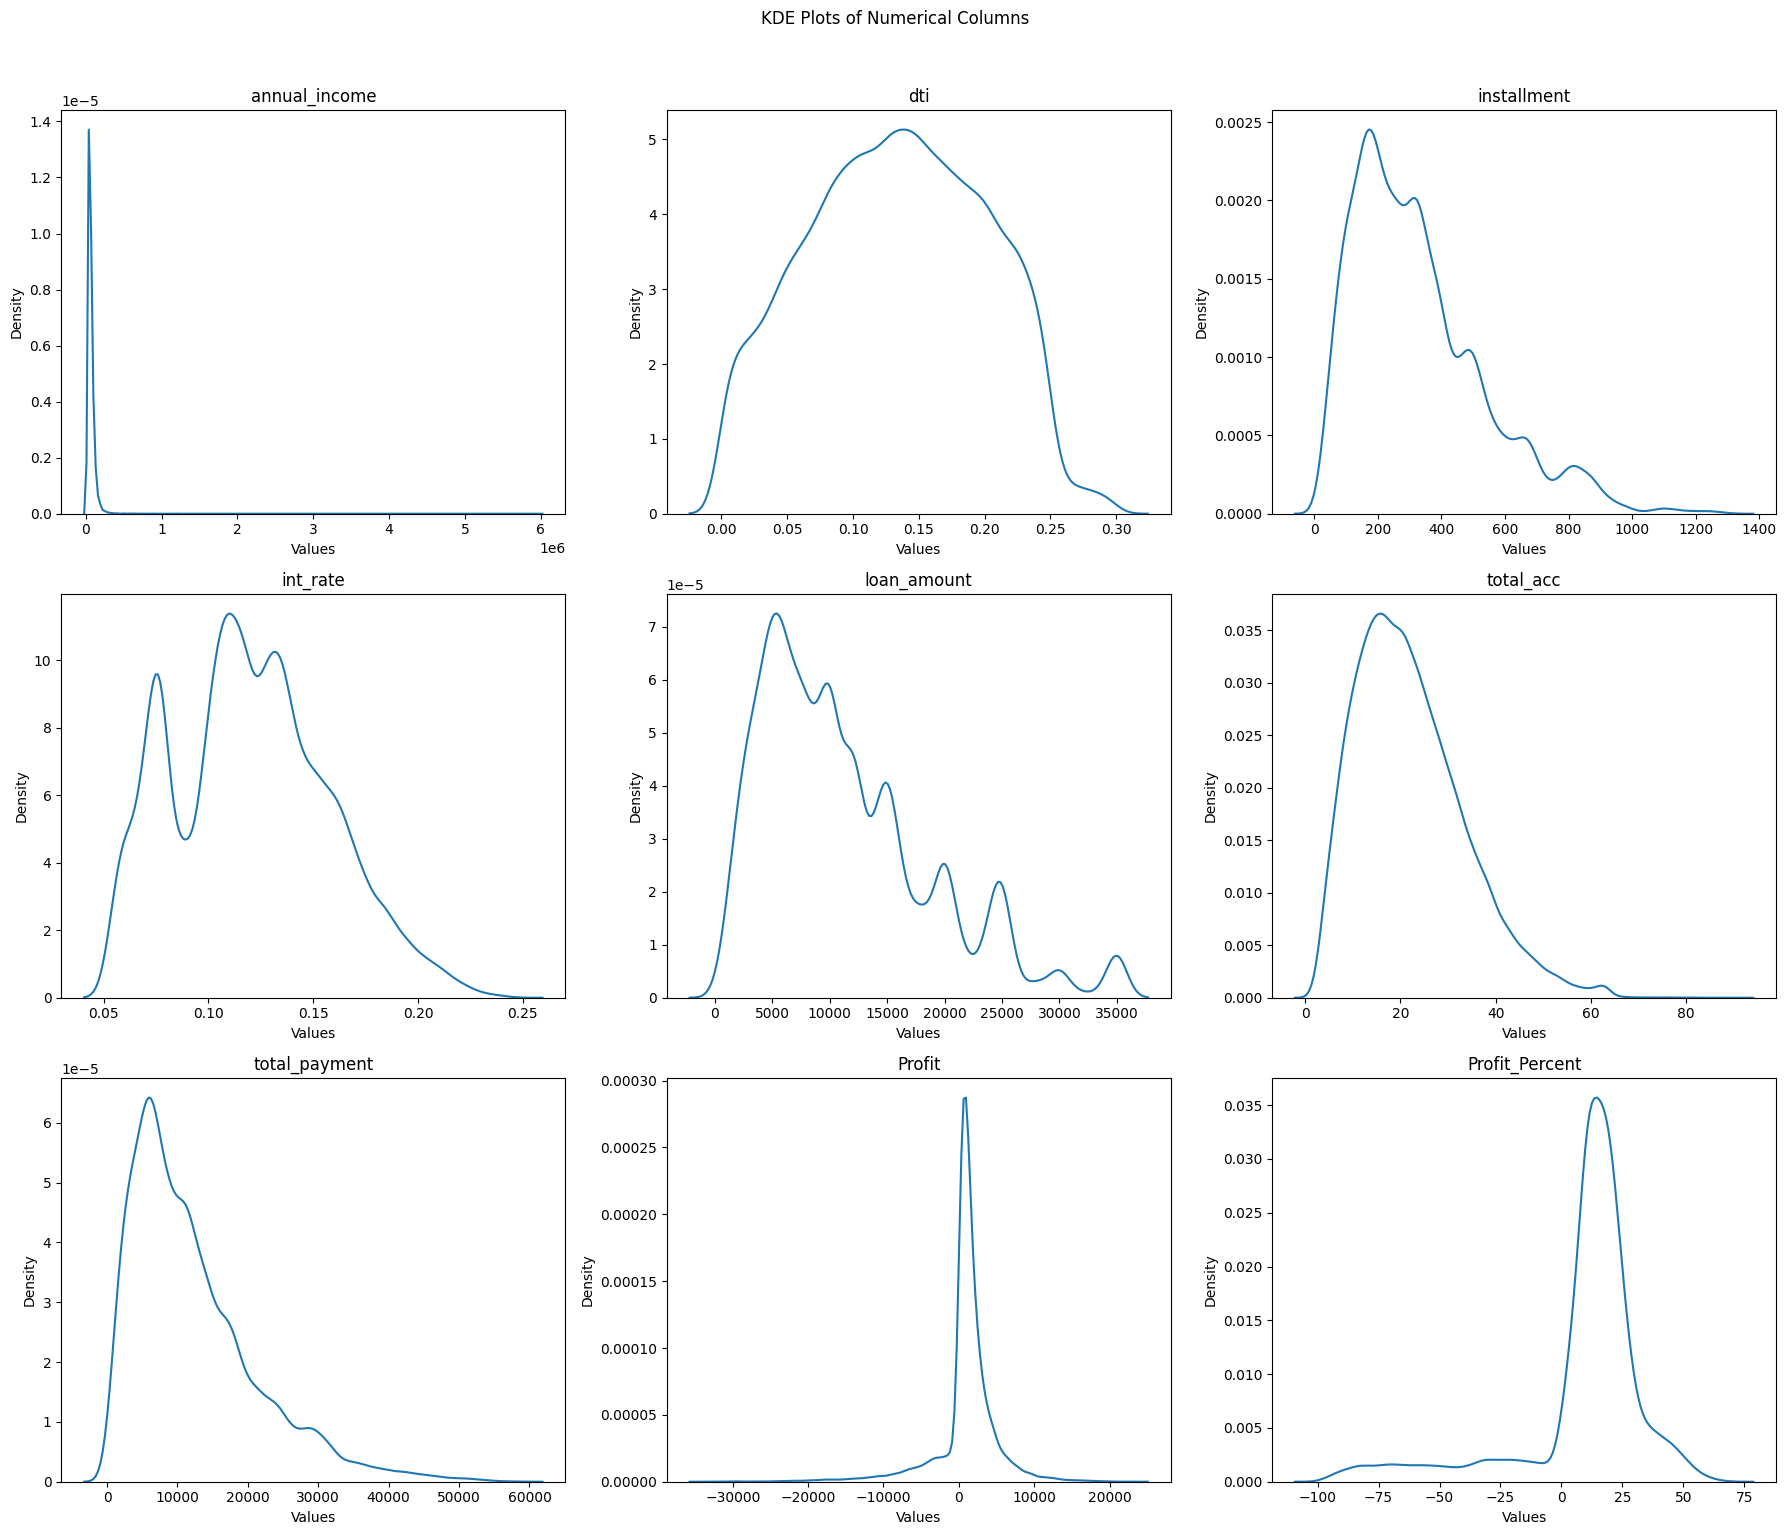

Skewness
annual_income     31.074172
dti               -0.029921
installment        1.120447
int_rate           0.292264
loan_amount        1.050775
total_acc          0.823141
total_payment      1.333828
Profit            -1.646347
Profit_Percent    -1.874019
dtype: float64


In [41]:
skewness = merged_df[numerical_columns].skew()
#merged_df[numerical_columns].hist(bins=30, figsize=(14, 10))
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Flatten the axes array
axes = axes.flatten()

# Loop over numerical columns
for i, col in enumerate(numerical_columns):
    # Plot KDE plot for each numerical column
    sns.kdeplot(data=merged_df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('KDE Plots of Numerical Columns', y=1.02)
plt.tight_layout()
plt.show()

print('Skewness')
print(skewness)

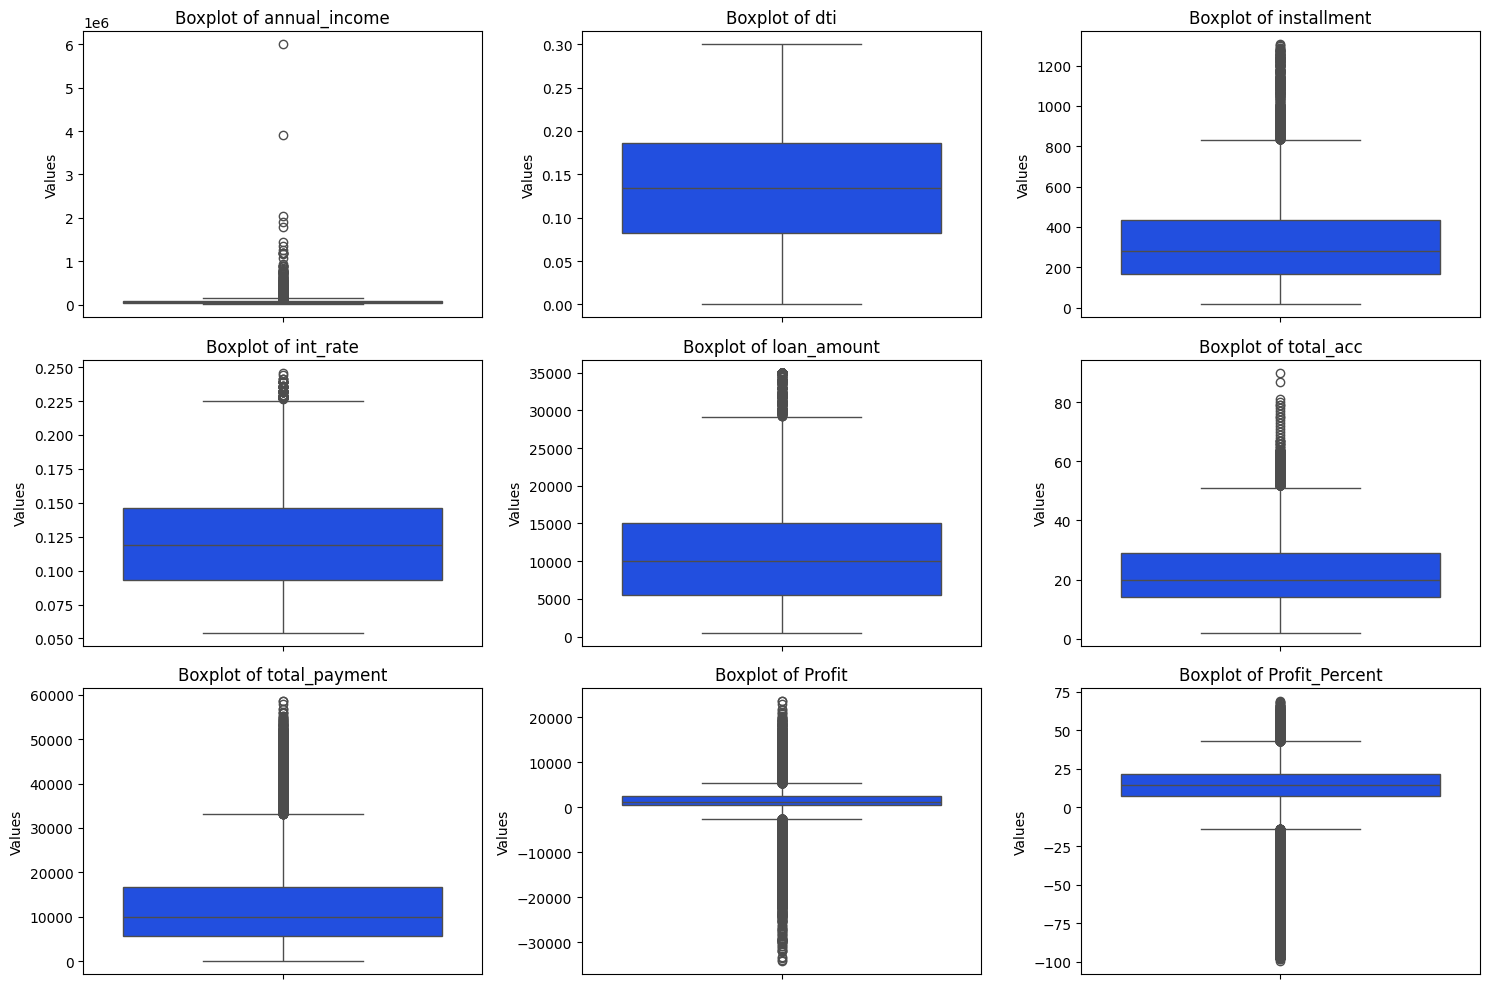

In [42]:
num_cols = 3  
num_rows = (len(numerical_columns) - 1) // num_cols + 1  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes if necessary
axes = axes.flatten()

# Loop over numerical columns and create boxplots
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=col, data=merged_df, ax=axes[i], palette = 'bright')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('Values')
    
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

While there are numerous outliers present in the dataset, I intend to target only the most extreme instances. In particular, I will focus on removing the top two outliers observed in both the 'annual_income' and 'total_acc' columns, each of which exceeds a value of 80.

## Removing Extreme outliers

In [43]:
merged_df[merged_df['annual_income'] > 3000000]

id address_state  emp_length                           emp_title  \
26333  513542            CA  10 > years                         POST OFFICE   
27136  519954            NM     3 years  LEA REGIONAL HOSPITAL/PECOS VALLEY   

      grade home_ownership issue_date last_credit_pull_date last_payment_date  \
26333     C       Mortgage 2021-05-10            2021-05-11        2021-04-11   
27136     B       Mortgage 2021-06-10            2021-06-15        2021-06-15   

      loan_status next_payment_date           purpose sub_grade       term  \
26333  Fully Paid        2021-05-11  Home improvement        C1  36 months   
27136  Fully Paid        2021-07-15  Home improvement        B3  60 months   

       annual_income     dti  installment  int_rate  loan_amount  total_acc  \
26333      6000000.0  0.0001   167.839996    0.1273       5000.0         10   
27136      3900000.0  0.0020   334.079987    0.1062      25000.0         32   

       total_payment  Term_Mnths  Profit  Profit_Percent  Cluster  \
26333           5514        36.0   514.0           10.28       11   
27136          20045        60.0 -4955.0          -19.82        6   

           job_title address_state_full  Latitude  Longitude issue_date_month  
26333  Organizations         California   36.7783   119.4179              May  
27136     Healthcare         New Mexico   34.9727   105.0324             June

In [44]:
merged_df[merged_df['total_acc'] > 80]

id address_state  emp_length                  emp_title grade  \
11416  521974            CA     4 years           SAN MATEO COUNTY     B   
20951  779179            NV  10 > years     UNITED STATES AIRFORCE     C   
30121  523116            TX  10 > years  WEST I-10 FIRE DEPARTMENT     F   

      home_ownership issue_date last_credit_pull_date last_payment_date  \
11416           Rent 2021-05-10            2021-03-11        2021-03-11   
20951       Mortgage 2021-06-11            2021-05-16        2021-08-12   
30121       Mortgage 2021-06-10            2021-07-14        2021-04-12   

      loan_status next_payment_date             purpose sub_grade       term  \
11416  Fully Paid        2021-04-11  Debt consolidation        B1  36 months   
20951  Fully Paid        2021-09-12  Debt consolidation        C3  60 months   
30121  Fully Paid        2021-05-12      Major purchase        F4  60 months   

       annual_income     dti  installment  int_rate  loan_amount  total_acc  \
11416       125000.0  0.0516   373.130005    0.1038      11500.0         90   
20951        76000.0  0.1825   418.739990    0.1399      18000.0         87   
30121        75996.0  0.1649   314.010010    0.1941      12000.0         81   

       total_payment  Term_Mnths  Profit  Profit_Percent  Cluster  \
11416          12189        36.0   689.0        5.991304        9   
20951          20052        60.0  2052.0       11.400000       11   
30121          15624        60.0  3624.0       30.200000        3   

            job_title address_state_full  Latitude  Longitude issue_date_month  
11416  Public Service         California   36.7783   119.4179              May  
20951   Organizations             Nevada   38.8026   116.4194             June  
30121  Public Service              Texas   31.9686    99.9018             June

In [45]:
merged_df = merged_df[merged_df['annual_income'] <= 3000000]
merged_df = merged_df[merged_df['total_acc'] <= 80]

## Re-Evaluate skewness

In [46]:
skewness = merged_df[numerical_columns].skew()
print(skewness)

annual_income     9.221133
dti              -0.029801
installment       1.120410
int_rate          0.292240
loan_amount       1.050900
total_acc         0.813599
total_payment     1.333935
Profit           -1.646386
Profit_Percent   -1.874027
dtype: float64


The skewness of the 'annual_income' variable has improved significantly, decreasing from 31 to 9. Given that this is a classification task, where parametric models like decision trees and random forests are employed, the impact of skewness is minimal. However, we will conduct experiments both with and without log-transformation to assess its effect on model performance.

## B) Categorical Features 

In [47]:
merged_df.head(1)

id address_state emp_length emp_title grade home_ownership issue_date  \
0  1077430            GA   < 1 year     RYDER     C           Rent 2021-02-11   

  last_credit_pull_date last_payment_date  loan_status next_payment_date  \
0            2021-09-13        2021-04-13  Charged Off        2021-05-13   

  purpose sub_grade       term  annual_income   dti  installment  int_rate  \
0     Car        C4  60 months        30000.0  0.01    59.830002    0.1527   

   loan_amount  total_acc  total_payment  Term_Mnths  Profit  Profit_Percent  \
0       2500.0          4           1009        60.0 -1491.0          -59.64   

   Cluster      job_title address_state_full  Latitude  Longitude  \
0       11  Organizations            Georgia   32.1574    82.9071   

  issue_date_month  
0         February

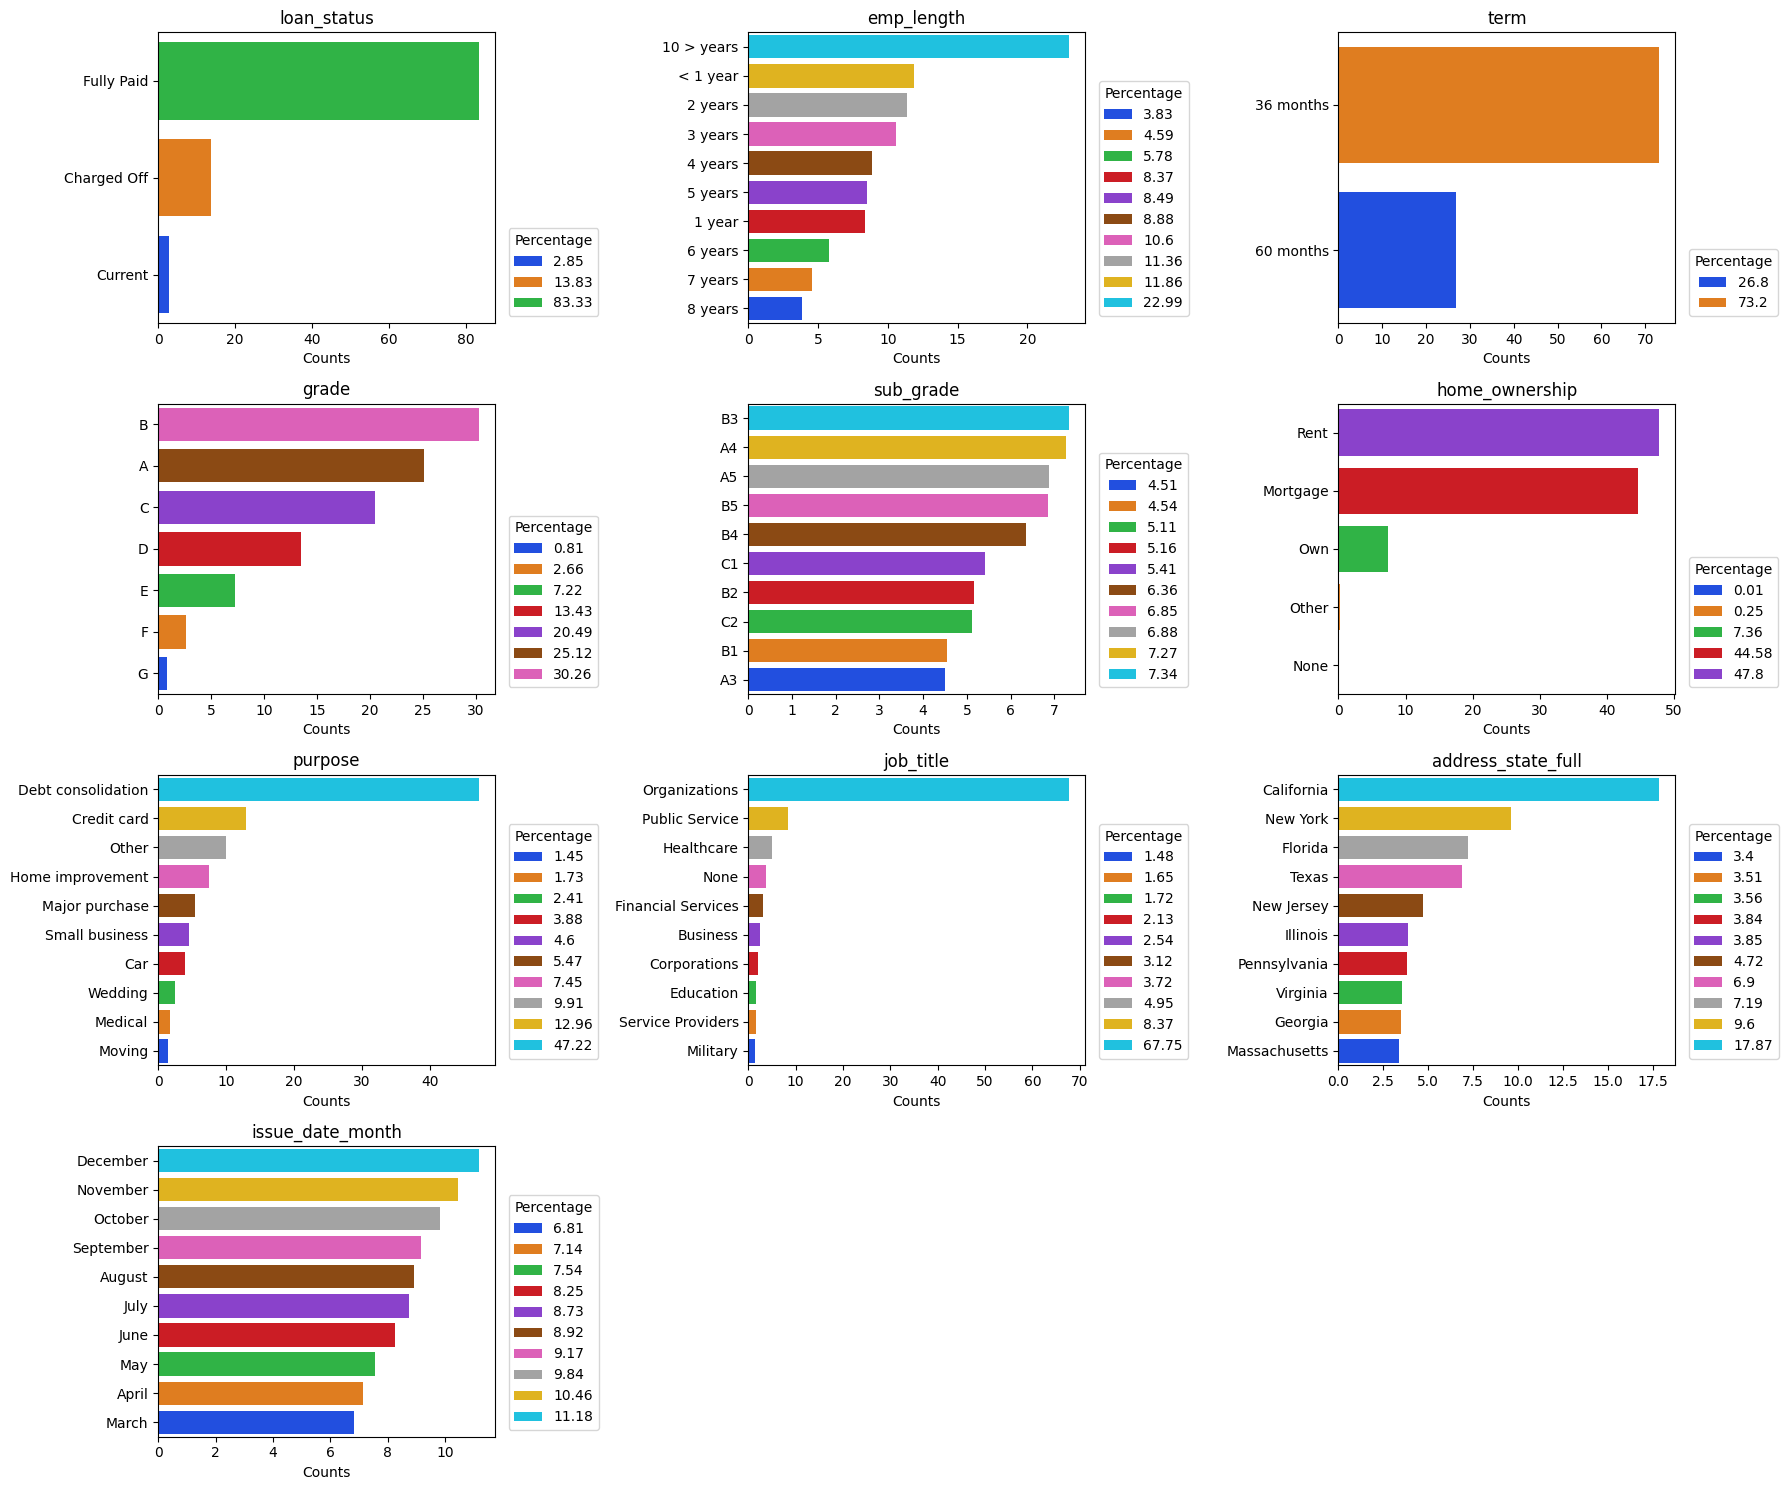

In [48]:
categorical_columns = ['loan_status', 'emp_length', 'term', 'grade', 'sub_grade', 'home_ownership', 'purpose', 'job_title', 
                       'address_state_full','issue_date_month']
top_categories = 10

fig, axes = plt.subplots(4, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    category_counts = merged_df[col].value_counts()
    sorted_categories = category_counts.index[:top_categories]
    #print(sorted_categories)
    # Filter data for the top categories
    filtered_data = merged_df[merged_df[col].isin(sorted_categories)]
    
    # Calculate counts based on filtered data
    total_count = merged_df[col].dropna().count()  # Total non-null count in the filtered column
    counts = category_counts.loc[sorted_categories]
    
    # Rename the 'count' column
    counts = counts.rename('Percentage')
    
    # Calculate percentages
    percentages = round(counts * 100 / total_count,2)
    
    # Create the count plot with percentages as hue
    sns.barplot(x=percentages, y=sorted_categories, hue=percentages, ax=axes[i], palette='bright')
    
    axes[i].set_title(col)
    axes[i].set_xlabel('Counts')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', rotation=0)  

    # Rename legend and set position
    legend = axes[i].legend(title='Percentage', bbox_to_anchor=(1.02, 0), loc='lower left')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Out of all loans, 83% have been fully paid, 13% have been charged off, and 2% are currently active. Loans with a term of 36 months are nearly three times as common as those with a term of 60 months indicating a strong preference among borrowers for shorter loan durations. Approximately 90% of homeownership is divided between rental and mortgage, as owning a home may imply lower financial strain.

The majority of loans, comprising around 67%, originate from organizations such as STARBUCKS, while public service accounts for 8% of loans. This trend may be attributed to employee loan programs and the stable employment typically found within these organizations.

Regarding loan purposes, 'Debt Consolidation' accounts for the largest share at 47.2%, followed by credit card debt consolidation at 12%. 'Debt Consolidation' is often chosen for its potential to secure lower interest rates compared to individual debts, resulting in benefits such as interest savings, simplified repayment, and improved creditworthiness

Based on popular charts for US states, California, New York, Florida, and Texas consistently rank among the top five most popular states in the US. Consequently, the number of loans issued tends to be highest in these states. The popularity of these states attracts entrepreneurs and investors, leading to increased economic activity and demand for financial services, including loans.

From the bar plot, it's evident that there is an increase in loan issuance towards the end of the year, particularly in December and November. This trend could be attributed to various factors such as end-of-year financial planning, holiday expenses, or seasonal spending patterns. November might see a surge in loan issuance due to the preparation for holiday expenses and end-of-year financial decisions, which often coincide with the upcoming holiday season.

# 4) EDA - Bivariate/ Multivariate

# 4a) Profit

## Loan Status Distribution Across Profit

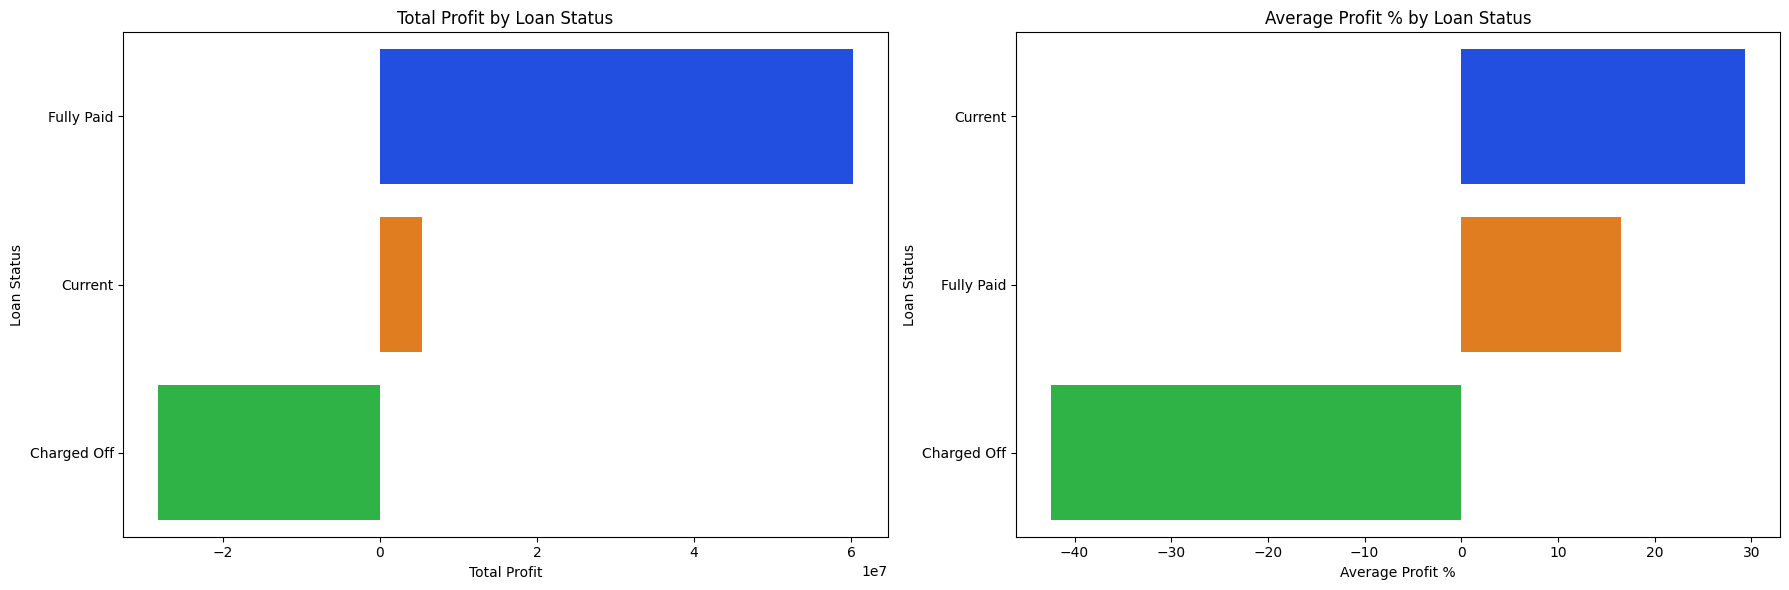

In [49]:
Profit = merged_df.groupby('loan_status')['Profit'].sum()
Profit_df = pd.DataFrame(Profit)
Profit_df = Profit_df.sort_values(by='Profit', ascending=False).reset_index()

Profit_Percent = merged_df.groupby('loan_status')['Profit_Percent'].mean()
Profit_Percent_df = pd.DataFrame(Profit_Percent)
Profit_Percent_df = Profit_Percent_df.sort_values(by='Profit_Percent', ascending=False).reset_index()

plt.figure(figsize=(18, 6)) 

plt.subplot(1,2,1)
sns.barplot(x = 'Profit', y = 'loan_status',data = Profit_df, palette='bright')
plt.xlabel('Total Profit')
plt.ylabel('Loan Status')
plt.title('Total Profit by Loan Status')

plt.subplot(1,2,2)
sns.barplot(x = 'Profit_Percent', y = 'loan_status',data = Profit_Percent_df, palette='bright')
plt.xlabel('Average Profit %')
plt.ylabel('Loan Status')
plt.title('Average Profit % by Loan Status')

plt.tight_layout()
plt.show()

Fully Paid loans are most profitable as a whole, while Charged Off loans consistently result in losses. Current loans are as profitable as Fully Paid loans, showing that ongoing repayment is financially viable. On average, each Charged Off loan incurs a loss of -42%, while Fully Paid loans generate profits of 16%, and Current loans achieve 29%.The higher profitability of Current loans can be attributed to the fact that borrowers are actively making repayments on these loans, indicating a lower risk of default compared to Charged Off loans. Effective risk management is crucial to optimize profitability and minimize losses in lending operations

## Analyzing Profit by State

In [50]:
address_profit = merged_df.groupby('address_state_full')['Profit'].sum().sort_values(ascending = False)
address_profit_df = pd.DataFrame(address_profit).reset_index()
address_profit_df_top10 = address_profit_df.head(10)

address_profit = merged_df.groupby('address_state_full')['Profit'].sum().sort_values(ascending = True)
address_profit_df = pd.DataFrame(address_profit).reset_index()
address_profit_df_bottom10 = address_profit_df.head(10)

address_profit_percent = merged_df.groupby('address_state_full')['Profit_Percent'].sum().sort_values(ascending = False)
address_profit_percent_df = pd.DataFrame(address_profit_percent).reset_index()
address_profit__percent_df_top10 = address_profit_percent_df.head(10)

address_profit_percent = merged_df.groupby('address_state_full')['Profit_Percent'].sum().sort_values(ascending = True)
address_profit_percent_df = pd.DataFrame(address_profit_percent).reset_index()
address_profit__percent_df_bottom10 = address_profit_percent_df.head(10)



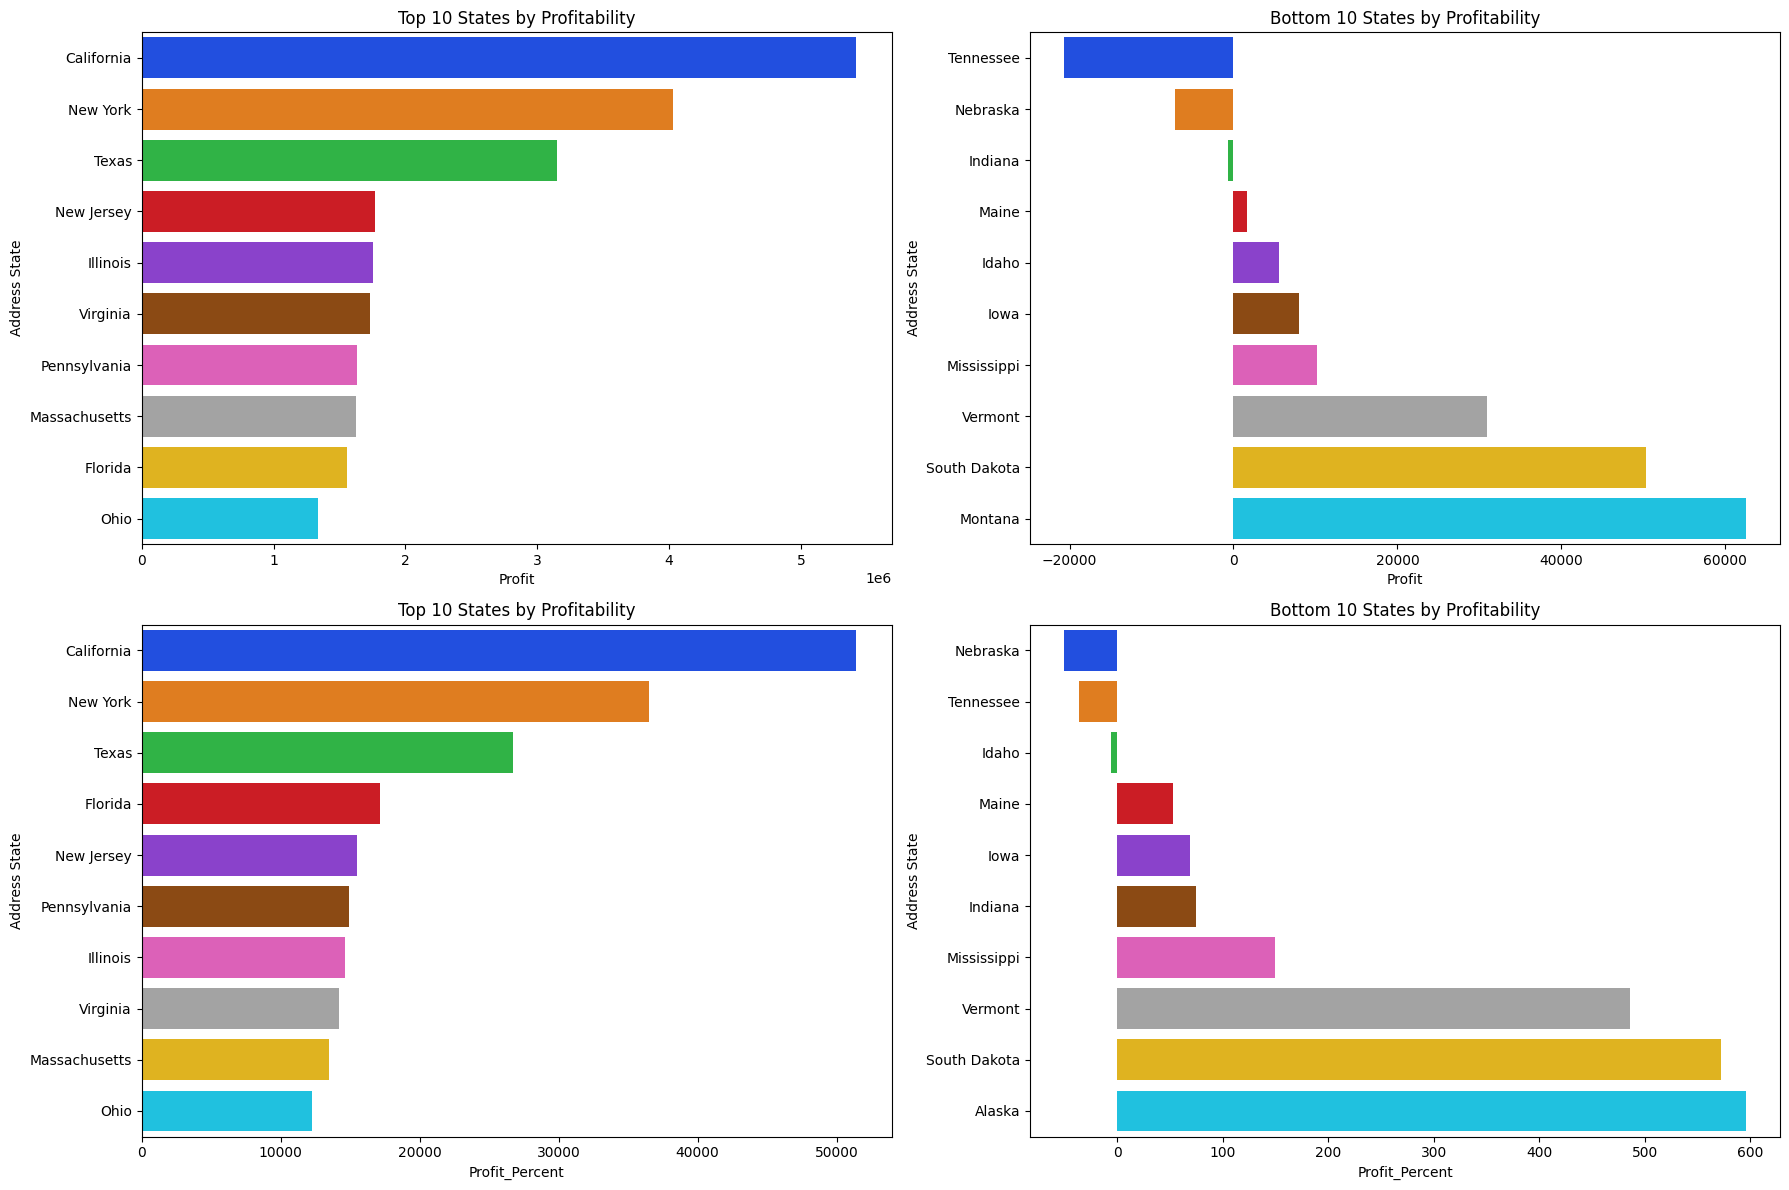

In [51]:
plt.figure(figsize = (18,12))

plt.subplot(2,2,1)
sns.barplot(x = 'Profit', y = 'address_state_full', data = address_profit_df_top10, palette='bright')
plt.xlabel('Profit')
plt.ylabel('Address State')
plt.title('Top 10 States by Profitability')

plt.subplot(2,2,2)
sns.barplot(x = 'Profit', y = 'address_state_full', data = address_profit_df_bottom10, palette='bright')
plt.xlabel('Profit')
plt.ylabel('Address State')
plt.title('Bottom 10 States by Profitability')

plt.subplot(2,2,3)
sns.barplot(x = 'Profit_Percent', y = 'address_state_full', data = address_profit__percent_df_top10, palette='bright')
plt.xlabel('Profit_Percent')
plt.ylabel('Address State')
plt.title('Top 10 States by Profitability')

plt.subplot(2,2,4)
sns.barplot(x = 'Profit_Percent', y = 'address_state_full', data = address_profit__percent_df_bottom10, palette='bright')
plt.xlabel('Profit_Percent')
plt.ylabel('Address State')
plt.title('Bottom 10 States by Profitability')

plt.tight_layout()
plt.show()

The top three states, California, New York, and Texas, have generated the highest profits, amounting to  5.4 million,
 4 million, and $3 million, respectively. It's worth noting that California, New York, and Texas are among the top 10 most populous states in the U.S., which could contribute to their higher profitability due to increased business activity and investment opportunities.

Conversely, three states, Tennessee, Nebraska, and Indiana, have incurred negative profits.

## Analyzing Profit by Job Title & Purpose

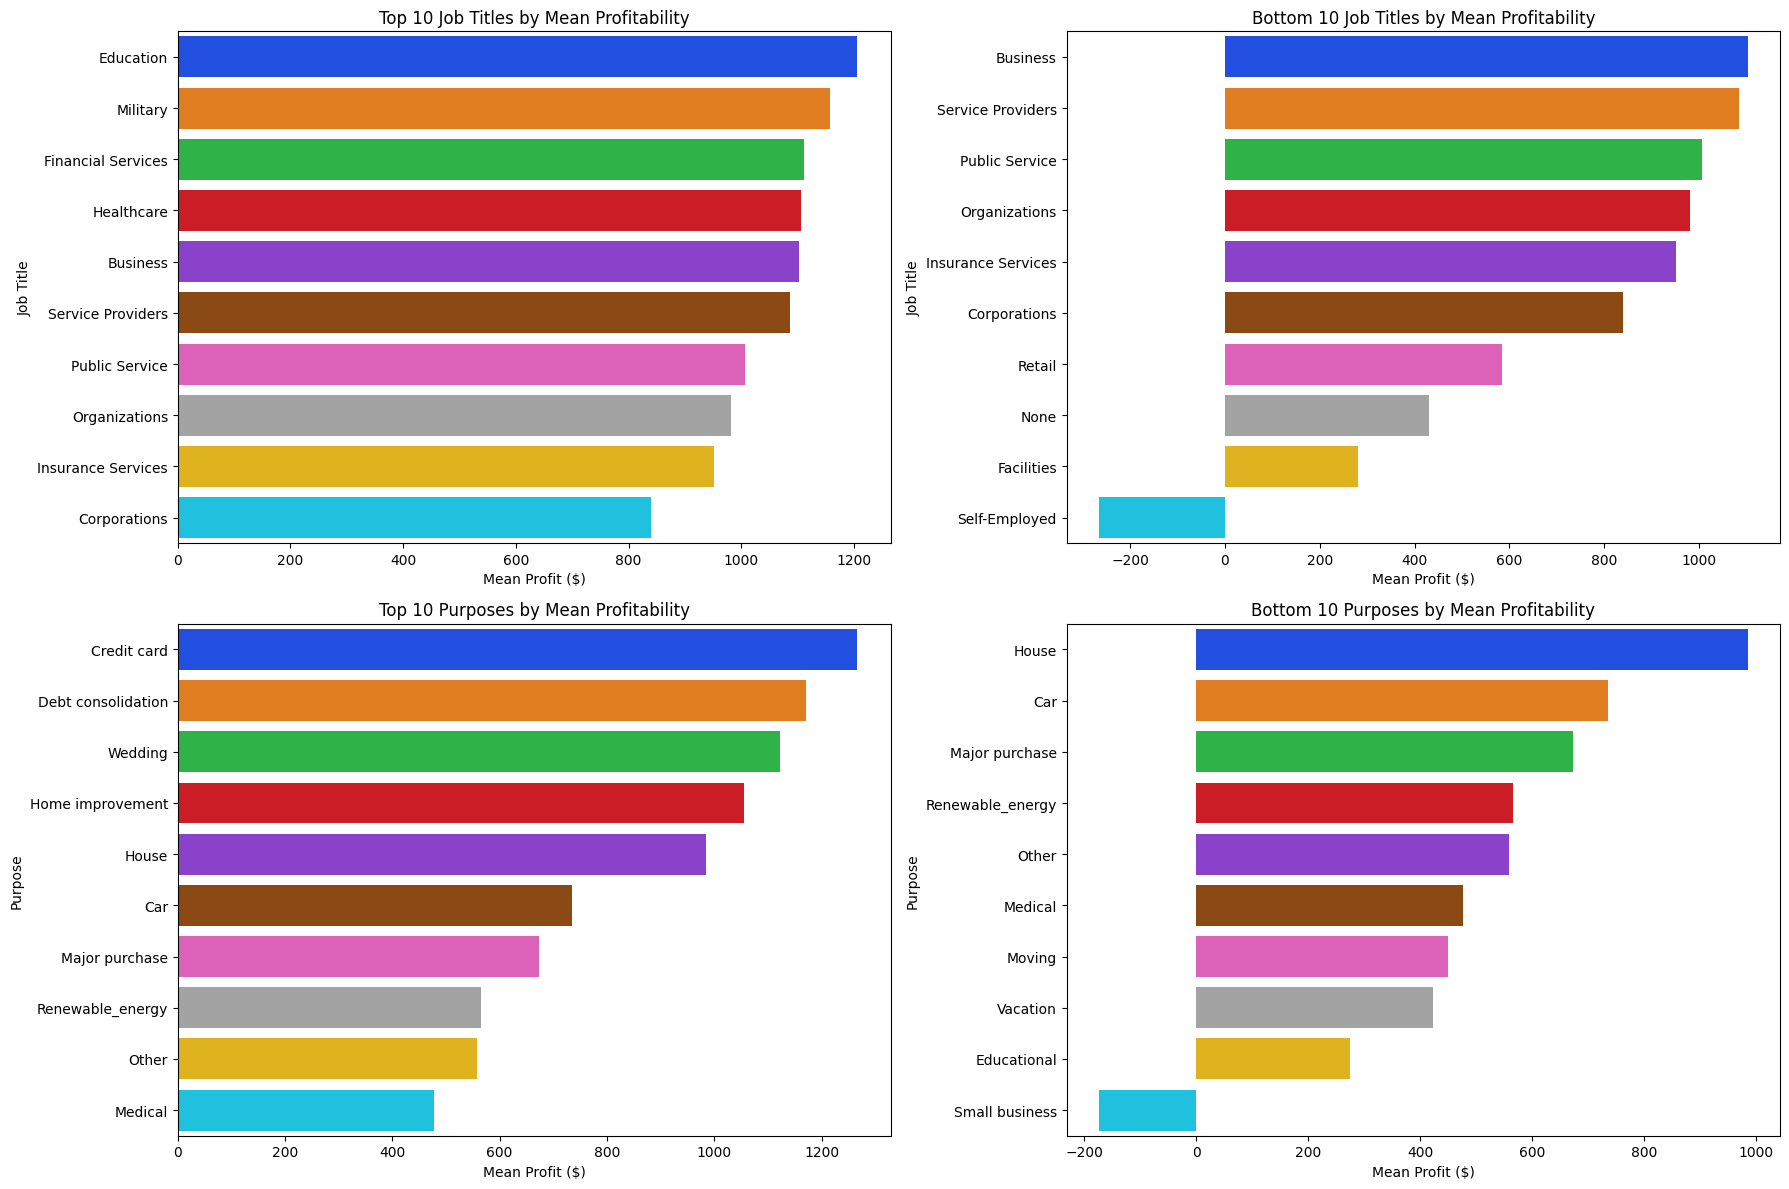

In [52]:
plt.figure(figsize = (18,12))

job_title_top = merged_df.groupby('job_title')['Profit'].mean().sort_values(ascending = False)
job_title_top_df = pd.DataFrame(job_title_top).reset_index()
job_title_top_df = job_title_top_df.head(10)

job_title_bottom = merged_df.groupby('job_title')['Profit'].mean().sort_values(ascending = False)
job_title_bottom_df = pd.DataFrame(job_title_bottom).reset_index()
job_title_bottom_df = job_title_bottom_df.tail(10)

purpose_top = merged_df.groupby('purpose')['Profit'].mean().sort_values(ascending = False)
purpose_top_df = pd.DataFrame(purpose_top).reset_index()
purpose_top_df = purpose_top_df.head(10)

purpose_bottom = merged_df.groupby('purpose')['Profit'].mean().sort_values(ascending = False)
purpose_bottom_df = pd.DataFrame(purpose_bottom).reset_index()
purpose_bottom_df = purpose_bottom_df.tail(10)

plt.subplot(2, 2, 1)
sns.barplot(x='Profit', y='job_title', data=job_title_top_df, palette='bright')
plt.xlabel('Mean Profit ($)')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles by Mean Profitability')

plt.subplot(2, 2, 2)
sns.barplot(x='Profit', y='job_title', data=job_title_bottom_df, palette='bright')
plt.xlabel('Mean Profit ($)')
plt.ylabel('Job Title')
plt.title('Bottom 10 Job Titles by Mean Profitability')

plt.subplot(2, 2, 3)
sns.barplot(x='Profit', y='purpose', data=purpose_top_df, palette='bright')
plt.xlabel('Mean Profit ($)')
plt.ylabel('Purpose')
plt.title('Top 10 Purposes by Mean Profitability')

plt.subplot(2, 2, 4)
sns.barplot(x='Profit', y='purpose', data=purpose_bottom_df, palette='bright')
plt.xlabel('Mean Profit ($)')
plt.ylabel('Purpose')
plt.title('Bottom 10 Purposes by Mean Profitability')

plt.tight_layout()
plt.show()

On average, sectors such as Education, Military, and Financial Services have demonstrated the highest profitability, whereas the self-employed sector exhibits a negative profile. This observation suggests the possibility of reducing the allocation of loans to self-employed individuals, as their ventures are not yielding significant profits. Conversely, there may be an opportunity to increase lending in the Education sector or introduce alternative schemes to attract more borrowers from profitable sectors. 

## Analyzing Profit by Duration

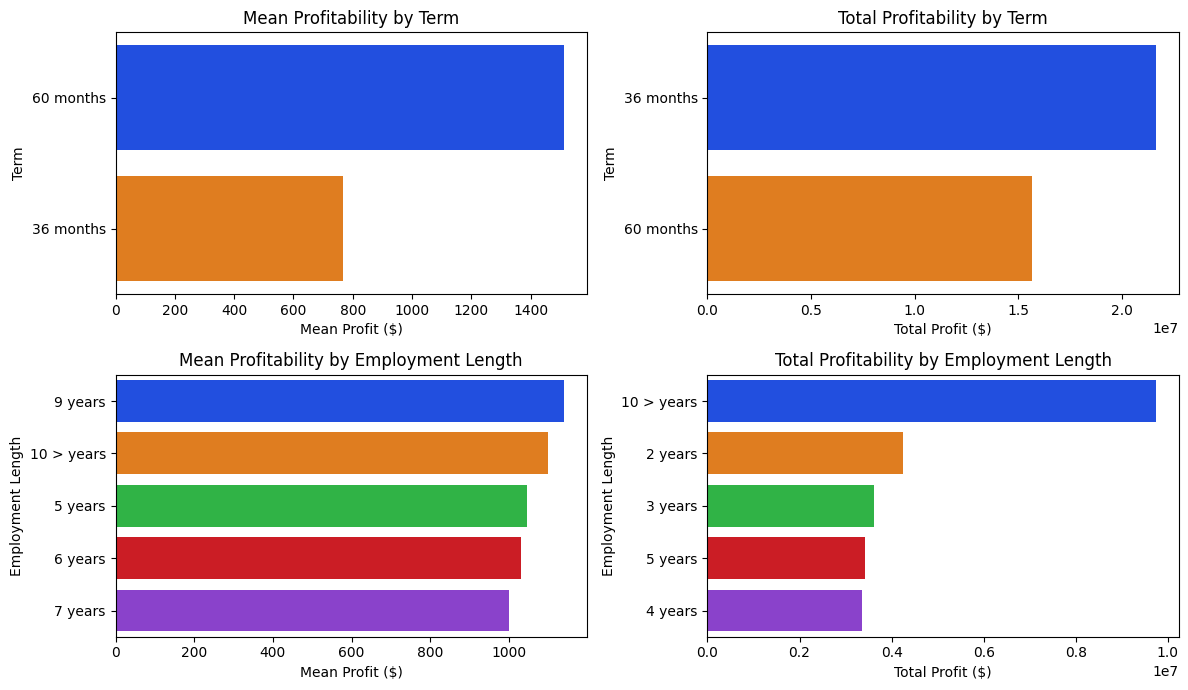

In [53]:
plt.figure(figsize=(12, 7))

term_mean = merged_df.groupby('term')['Profit'].mean().sort_values(ascending = False)
term_mean_df = pd.DataFrame(term_mean).reset_index()

term_sum = merged_df.groupby('term')['Profit'].sum().sort_values(ascending = False)
term_sum_df = pd.DataFrame(term_sum).reset_index()

emp_length = merged_df.groupby('emp_length')['Profit'].mean().sort_values(ascending = False)
emp_length_df = pd.DataFrame(emp_length).reset_index()
emp_length_df = emp_length_df.head()

emp_length_sum = merged_df.groupby('emp_length')['Profit'].sum().sort_values(ascending = False)
emp_length_sum_df = pd.DataFrame(emp_length_sum).reset_index()
emp_length_sum_df = emp_length_sum_df.head()

# Mean profitability by term
plt.subplot(2, 2, 1)
sns.barplot(x='Profit', y='term', data=term_mean_df, palette='bright')
plt.xlabel('Mean Profit ($)')
plt.ylabel('Term')
plt.title('Mean Profitability by Term')

# Total profitability by term
plt.subplot(2, 2, 2)
sns.barplot(x='Profit', y='term', data=term_sum_df, palette='bright')
plt.xlabel('Total Profit ($)')
plt.ylabel('Term')
plt.title('Total Profitability by Term')

# Mean profitability by employment length
plt.subplot(2, 2, 3)
sns.barplot(x='Profit', y='emp_length', data=emp_length_df, palette='bright')
plt.xlabel('Mean Profit ($)')
plt.ylabel('Employment Length')
plt.title('Mean Profitability by Employment Length')

# Total profitability by employment length
plt.subplot(2, 2, 4)
sns.barplot(x='Profit', y='emp_length', data=emp_length_sum_df, palette='bright')
plt.xlabel('Total Profit ($)')
plt.ylabel('Employment Length')
plt.title('Total Profitability by Employment Length')

plt.tight_layout()
plt.show()


On average, loans with a 60-month term tend to generate more profit due to their higher interest rates. Additionally, individuals with 9 years of employment experience have demonstrated the highest profitability, likely attributed to their stable income and financial management skills developed over time.

However, when considering total profitability, loans with a 36-month term emerge as the most profitable overall. This is primarily because the volume of loans with a 36-month term is approximately three times higher than those with a 60-month term. Moreover, employment lengths of 10 years or more yield the highest overall profitability, encompassing various employment durations beyond 10 years. Interestingly, the second-highest profitability is observed among individuals with a 2-year employment length. This may be attributed to individuals who have recently entered the workforce and require funds for initial expenses such as home renovations or career investments. 

## Analyzing Profit - Numerical Features

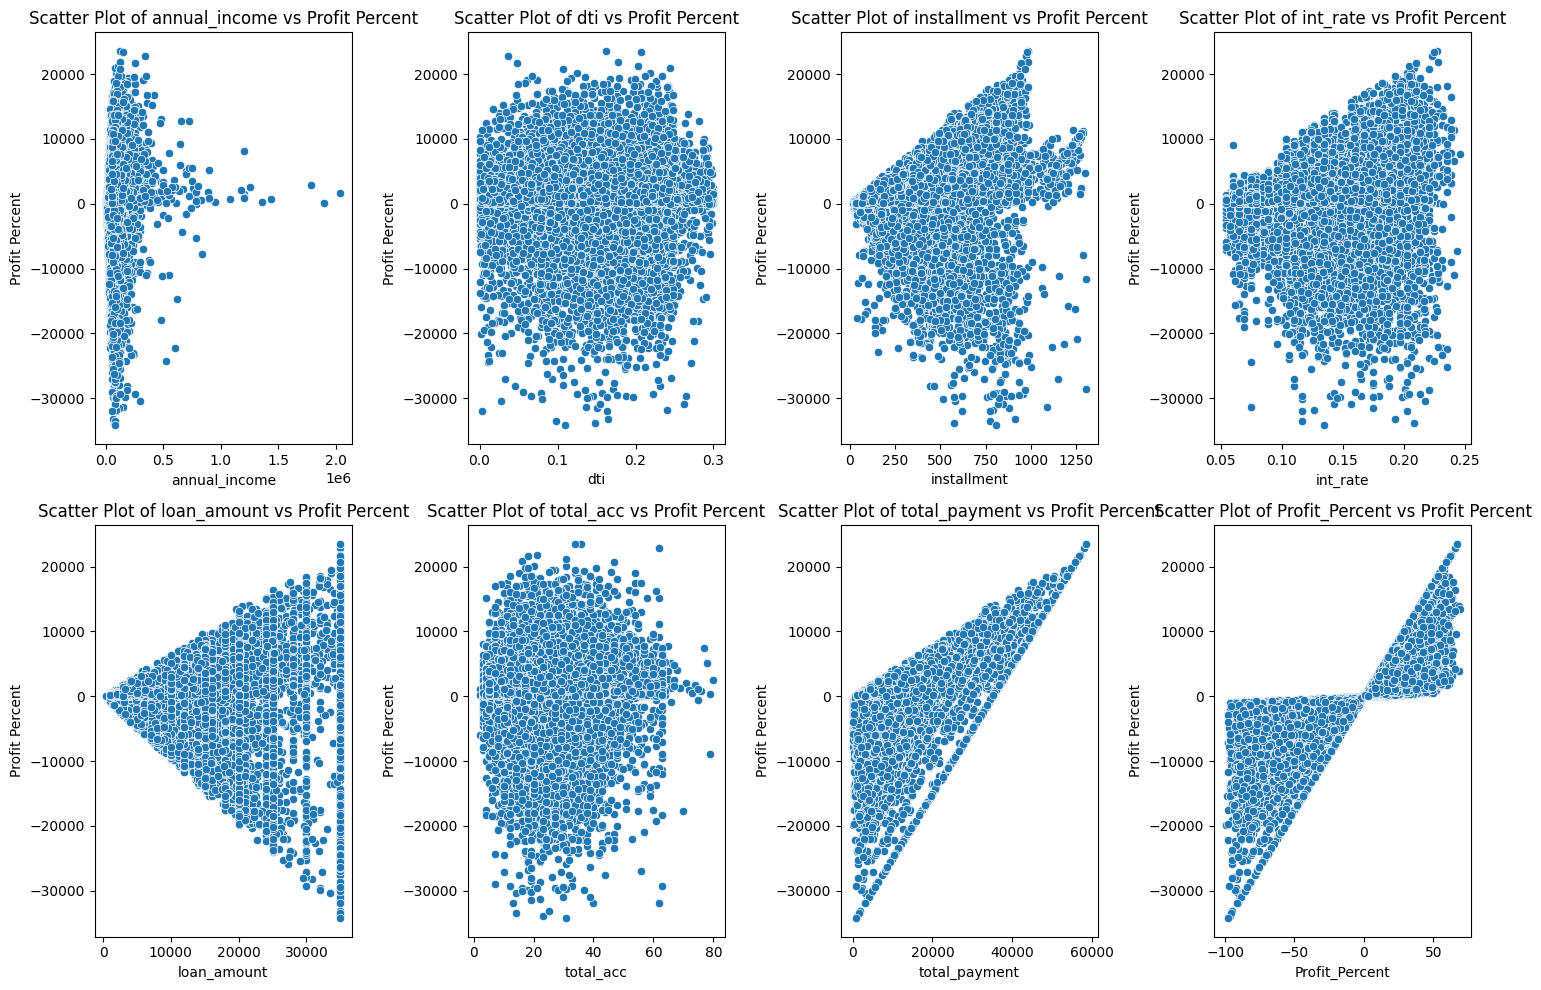

In [54]:
numerical_columns1 = ['annual_income','dti','installment','int_rate','loan_amount','total_acc','total_payment','Profit_Percent']

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns1, 1):
    plt.subplot(2,4,i)
    sns.scatterplot(x =column , y ='Profit' , data = merged_df)
    
    plt.xlabel(column)
    plt.ylabel('Profit Percent')
    plt.title(f'Scatter Plot of {column} vs Profit Percent')

plt.tight_layout()
plt.show()

<Axes: >

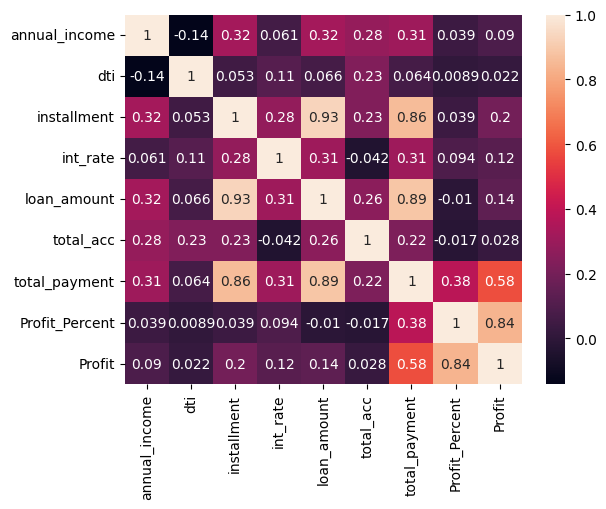

In [55]:
numerical_columns1a = ['annual_income','dti','installment','int_rate','loan_amount','total_acc','total_payment','Profit_Percent', 'Profit']

sns.heatmap(merged_df[numerical_columns1a].corr(), annot = True)

After analyzing both the heatmap and scatter plot, it is apparent that only the variables 'Profit_Percent' and 'total_payment' exhibit a strong correlation with 'Profit'. This implies that changes in 'Profit_Percent' and 'total_payment' are closely associated with fluctuations in 'Profit', while other numerical variables show weaker correlations.

# 4b) Charged Off Loans

In [56]:
categorical_columns1 = ['emp_length', 'term', 'grade', 'home_ownership', 'purpose', 'job_title', 
                       'address_state_full','issue_date_month']

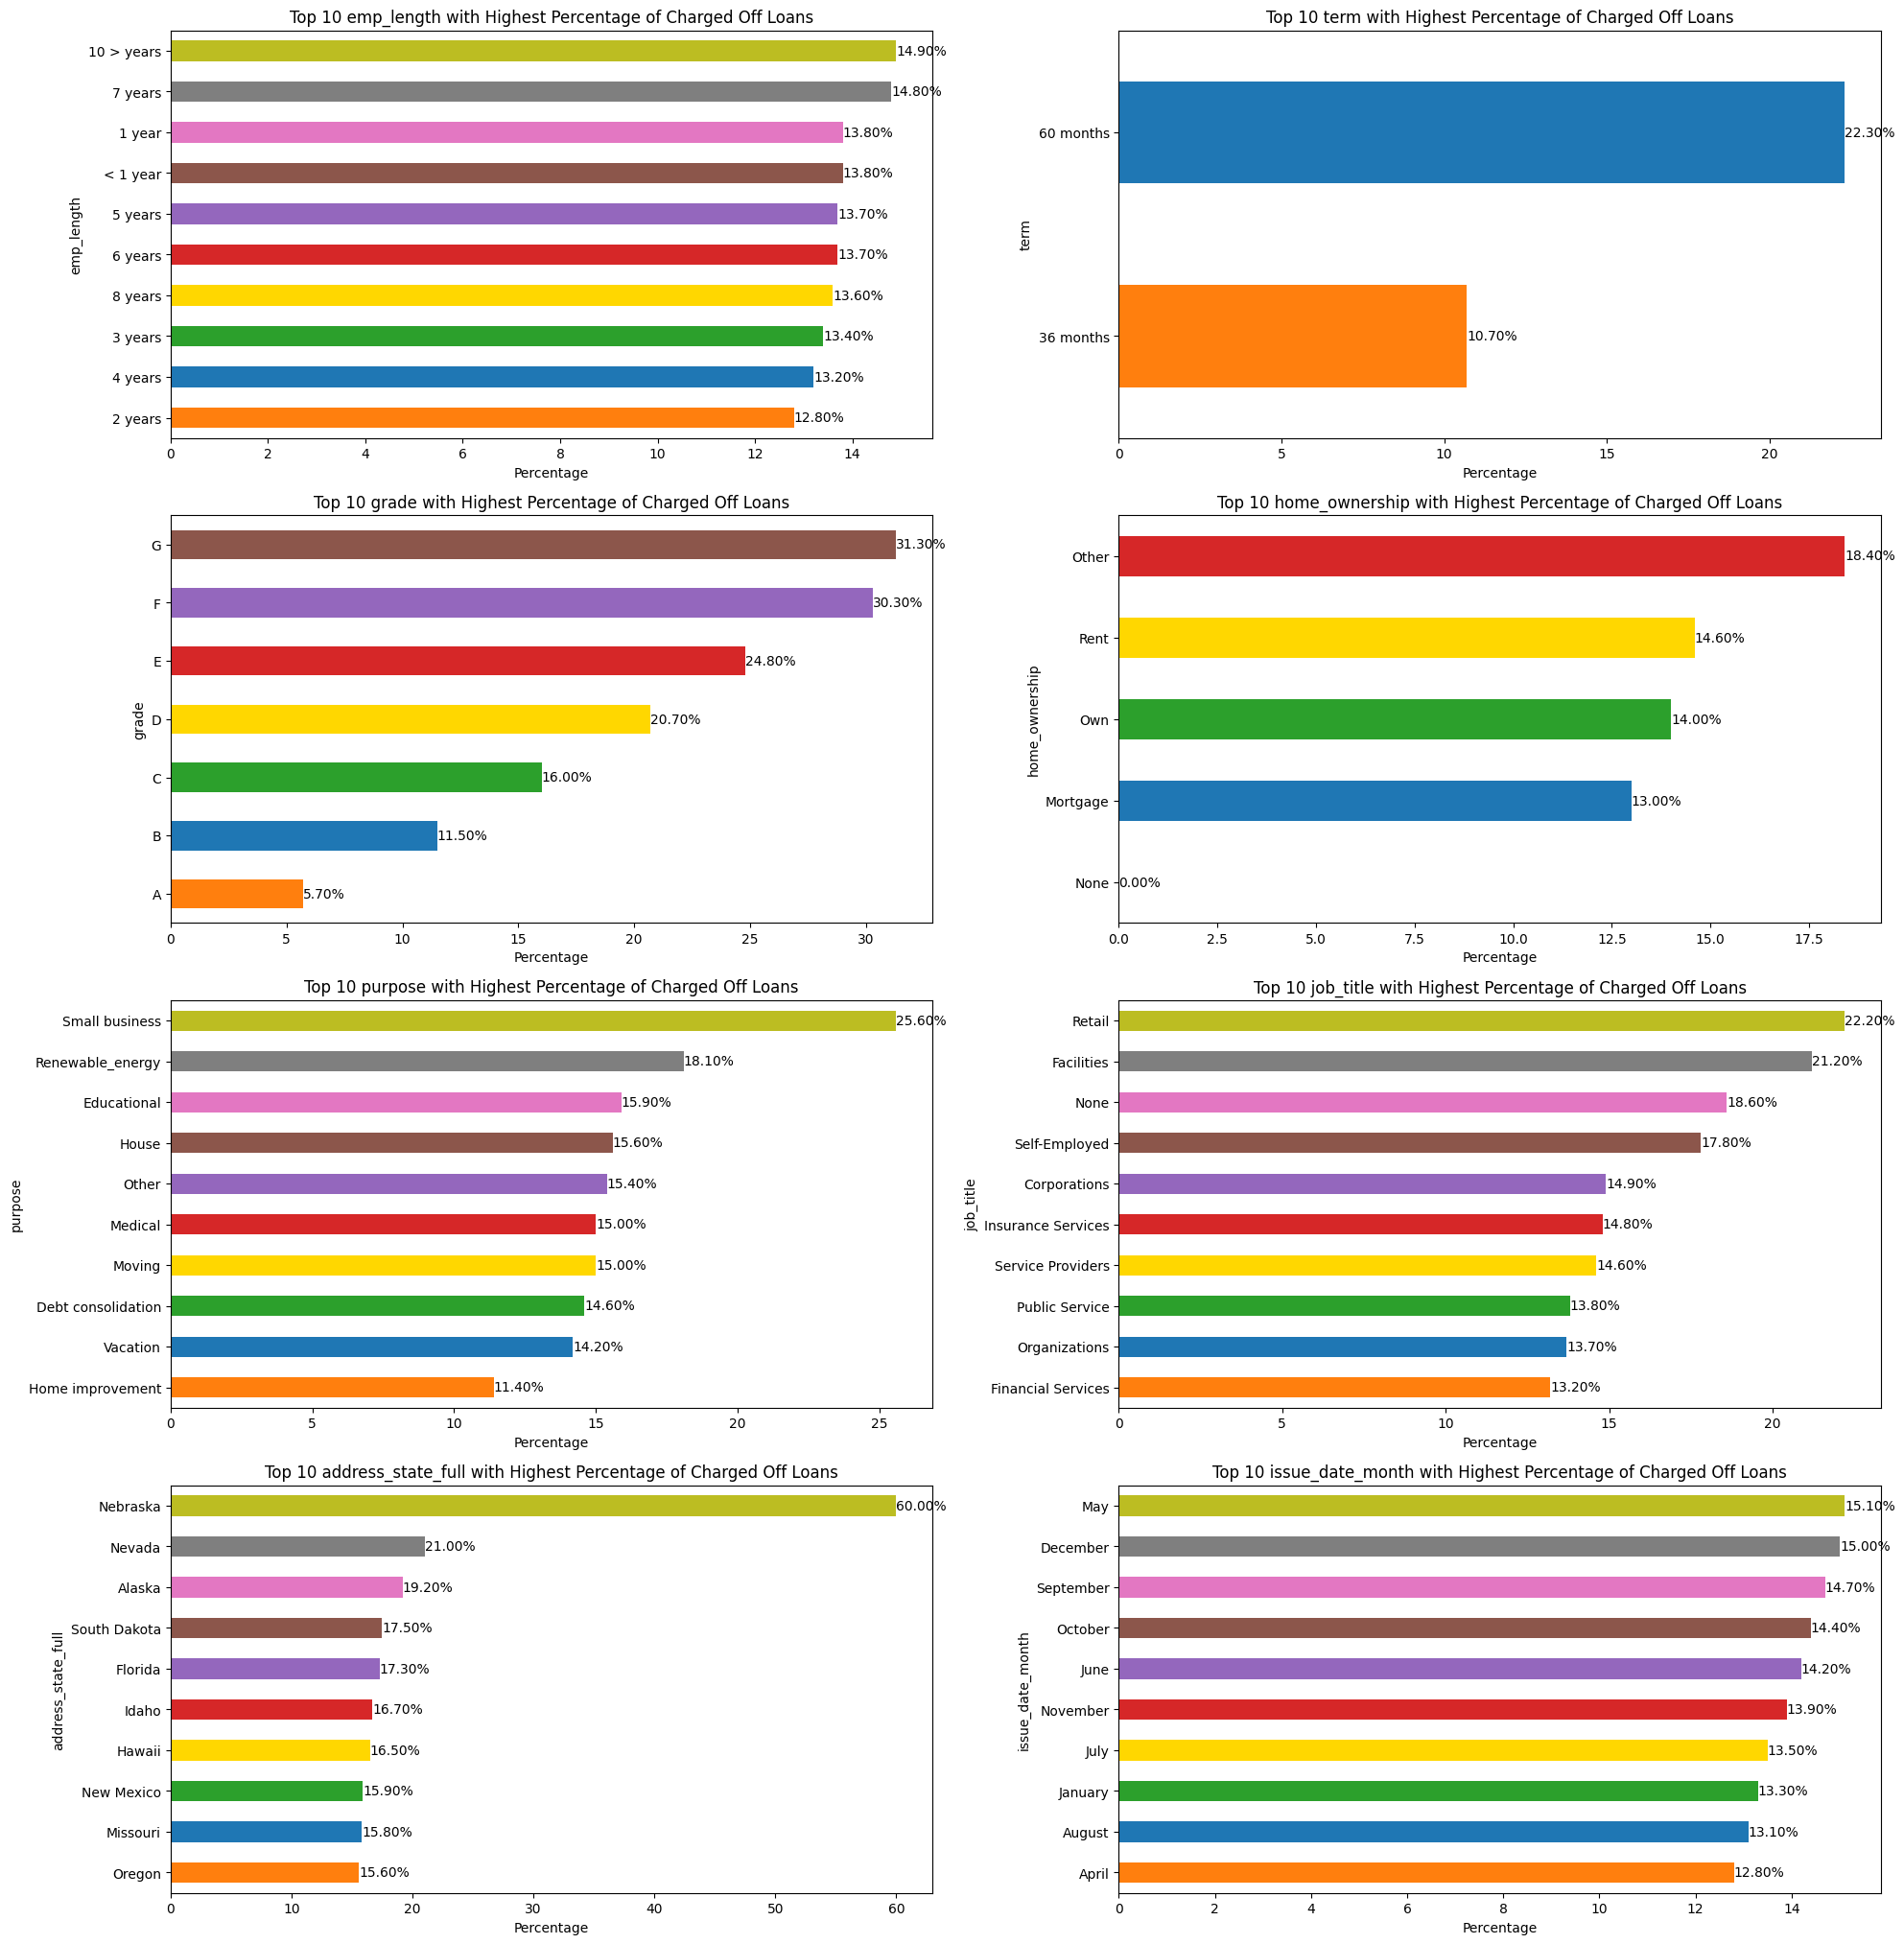

In [57]:
palette= [
    '#FF7F0E', '#1F77B4', '#2CA02C', '#FFD700', '#D62728',
    '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22'
]

# Set the figure size
plt.figure(figsize=(20, 25))

# Iterate over each column in categorical_columns1
for i, column in enumerate(categorical_columns1, 1):
    # Calculate the cross-tabulation and percentages
    cross_tab = pd.crosstab(merged_df[column], merged_df['loan_status'])
    cross_tab_percentage = cross_tab.apply(lambda x: round(x / x.sum(), 3) * 100, axis=1)
    
    # Sort the values by "Charged Off" percentage
    charged_off_sorted = cross_tab_percentage['Charged Off'].sort_values(ascending=False)
    
    # Select the top 10 values
    top_10_charged_off = charged_off_sorted.head(10)
    
    # Reverse the order of the top 10 values
    top_10_charged_off = top_10_charged_off[::-1]
    
    # Create subplot
    plt.subplot(5, 2, i)
    
    # Plot the bar chart horizontally with reversed order
    top_10_charged_off.plot(kind='barh', color=palette)
    plt.title(f'Top 10 {column} with Highest Percentage of Charged Off Loans')
    plt.xlabel('Percentage')
    plt.ylabel(column)
    
    # Add text labels on the right side of bars
    for index, value in enumerate(top_10_charged_off):
        plt.text(value, index, f'{value:.2f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

In this section, we will analyze categorical features with a loan status of "charged off." This is an important investigation as "charged off" loans represent instances where no profit was made, and understanding the contributing features can provide insights into factors associated with unsuccessful loan outcomes. 

We observe a clear trend in the 'Grade' classification, where the likelihood of charged-off loans increases as we progress through the alphabetical grading system from 'A' to 'G'. Notably, Grade 'G' presents the highest risk, with a 31% rate of charged-off loans.

Additionally, small business loans stand out with a quarter of them being charged off. This observation aligns with previous findings indicating negative profitability for small business loans.

Moreover, Nebraska state exhibits an incredibly high charged-off rate of 60%, which aligns with our findings indicating it has the lowest profitability percentage.

Additionally, the peak months for charged-off loans are May and December. May might exhibit elevated default rates owing to seasonal influences like heightened spending on vacations or home improvement projects. Conversely, December, being the holiday season, could experience increased default rates due to heightened expenditures combined with financial strain from holiday-related expenses.

## 4c) Interest Rate

## Interest Rate with categorical features

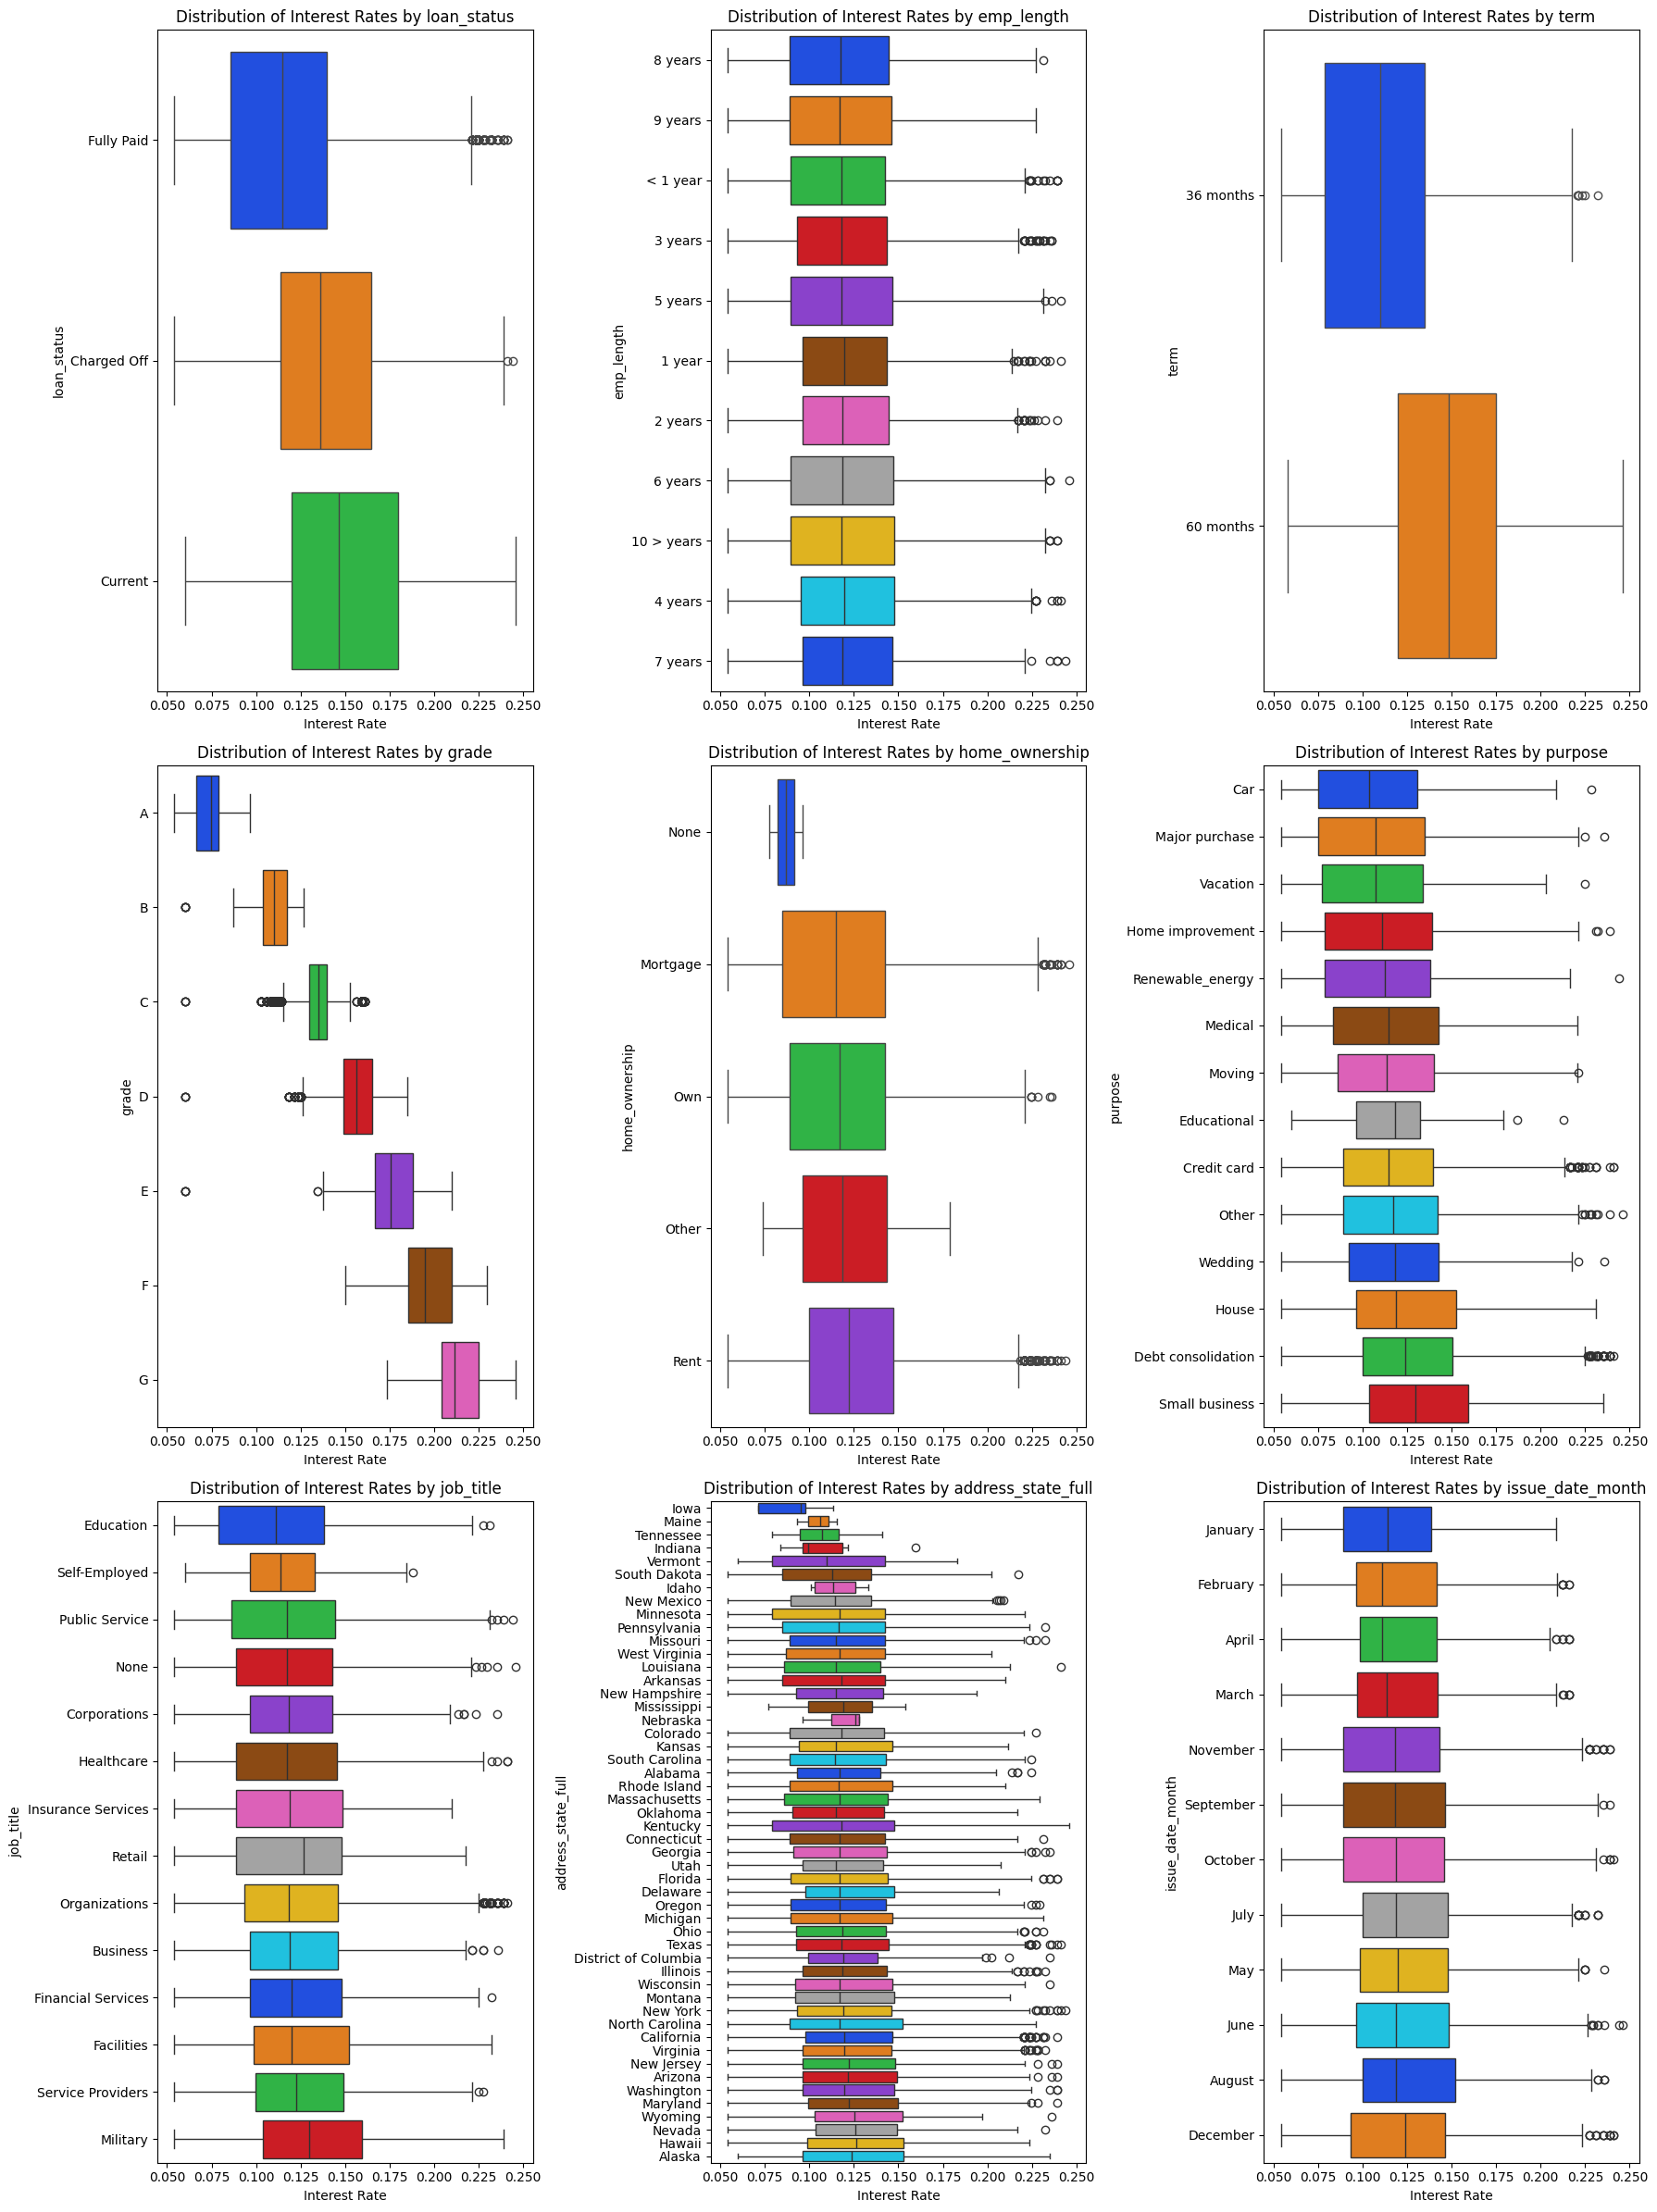

In [58]:
categorical_columns2 = ['loan_status', 'emp_length', 'term', 'grade', 'home_ownership', 'purpose', 'job_title', 
                       'address_state_full','issue_date_month']

plt.figure(figsize=(18, 24)) 

for i, column in enumerate(categorical_columns2, start=1):
    
    mean_interest_rates = merged_df.groupby(column)['int_rate'].mean().sort_values()
    sorted_order = mean_interest_rates.index.tolist()
    plt.subplot(3, 3, i) 
    sns.boxplot(x='int_rate', y=column, data=merged_df, palette='bright', order = sorted_order) 
    plt.ylabel(column) 
    plt.xlabel('Interest Rate') 
    plt.title(f'Distribution of Interest Rates by {column}') 
plt.tight_layout() 
plt.show()  

A higher interest rate typically indicates greater risk associated with the event or task. For instance, loans with a longer duration, such as those with a 60-month term, often entail higher interest rates compared to shorter-term loans like those with a 36-month term, reflecting the increased risk associated with a longer repayment period.

Regarding loan grades, there is a clear trend of higher average interest rates as the grades progress alphabetically. Specifically, loans with the highest grade 'G' have the highest average interest rate at 22%, whereas loans with the lowest grade 'A' have the lowest average interest rate at 7%.

Similarly, within the category of home ownership, rental properties often incur higher interest rates due to the perceived risk associated with renting compared to owning a home. Likewise, loans designated for small business ventures tend to carry higher interest rates, as the volatile nature of the business environment introduces additional risk factors. Economic downturns, for instance, can significantly impact small businesses' ability to repay loans, hence the higher interest rates.

In terms of job titles, occupations in the military, such as army or air force personnel, often incur higher interest rates, reflecting the inherent risks associated with these roles, including physical danger and potential deployment to conflict zones.

Furthermore, December typically sees higher interest rates, possibly due to increased holiday spending and associated financial strain.

## Applying ANOVA

Null Hypothesis (H0): There are no significant differences in the mean Interest rate values across the categories of the categorical variable. 

Alternative Hypothesis (H1): There are significant differences in the mean Interest rate values among the groups defined by the categorical variable.

In [59]:
from scipy.stats import f_oneway

categorical_columns1 = ['emp_length', 'term', 'grade', 'home_ownership', 'purpose', 'job_title', 
                       'address_state_full','issue_date_month']

for i in categorical_columns1:
    groups = merged_df.groupby(i)['int_rate']

    # Perform ANOVA
    f_statistic, p_value = f_oneway(*[group for _, group in groups])
    if p_value > 0.05:
        print(f"Accept {i} - P-value: {p_value}")
    else:
        print(f"Reject {i} - P-value: {p_value}")

Accept emp_length - P-value: 0.07554249655652724
Reject term - P-value: 0.0
Reject grade - P-value: 0.0
Reject home_ownership - P-value: 5.285798969869613e-36
Reject purpose - P-value: 4.395037949283562e-217
Reject job_title - P-value: 2.16167886587594e-11
Reject address_state_full - P-value: 1.6671706764629315e-06
Reject issue_date_month - P-value: 7.43412365184199e-33


## Interest Rate with numerical features

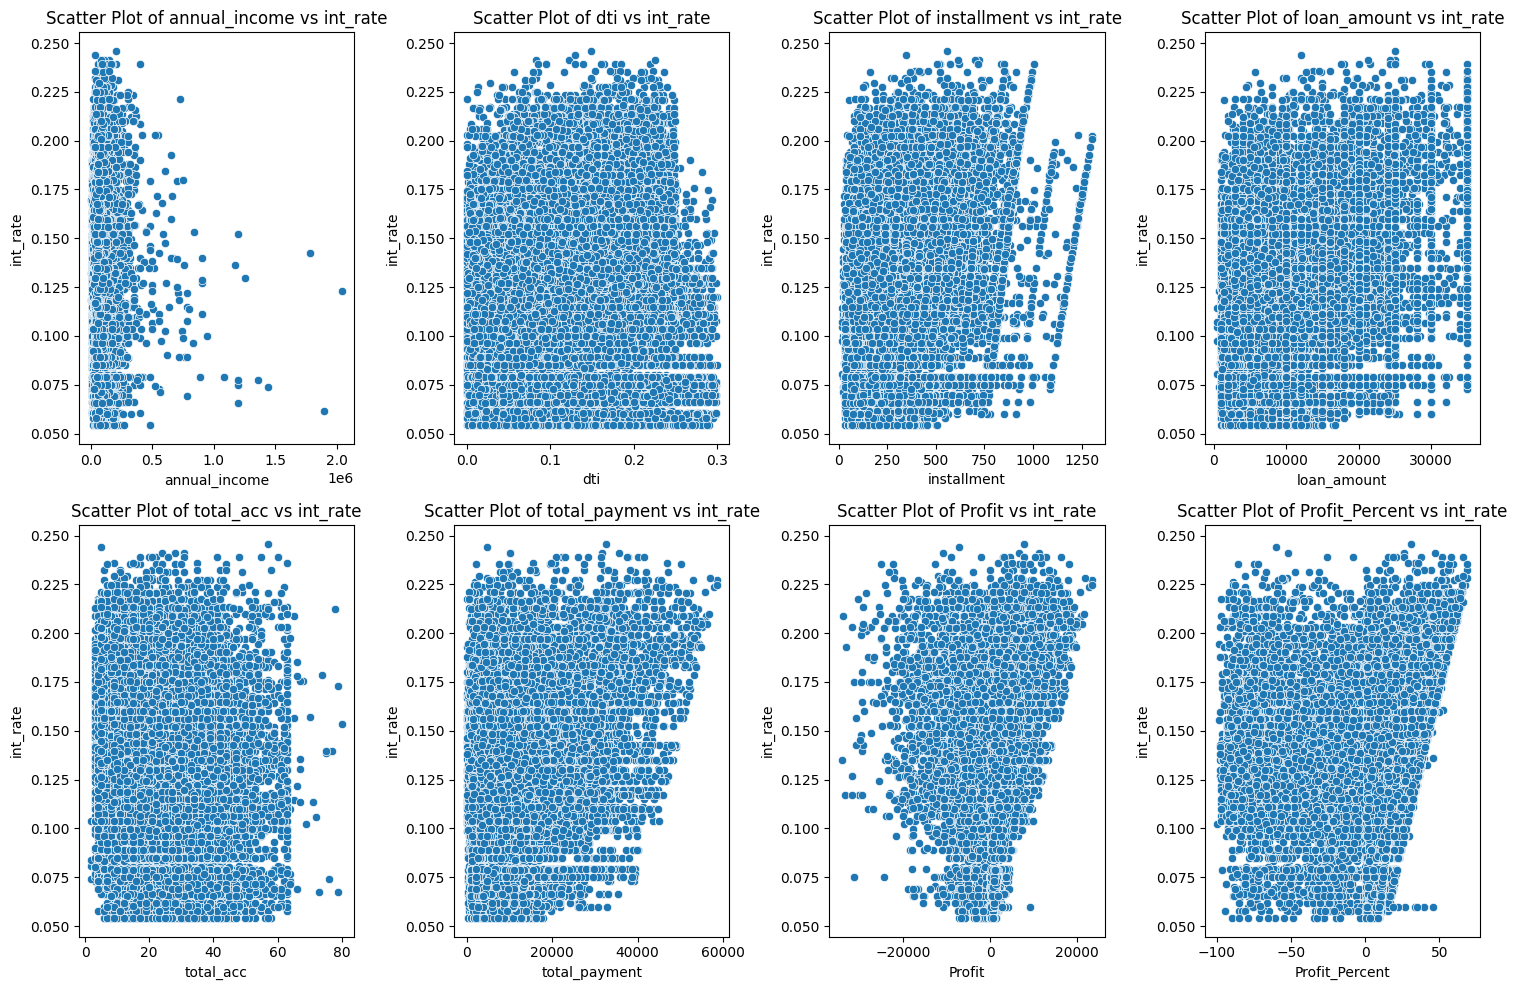

In [60]:
numerical_columns2 = ['annual_income','dti','installment','loan_amount','total_acc','total_payment','Profit','Profit_Percent']

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns2, 1):
    plt.subplot(2,4,i)
    sns.scatterplot(x =column , y ='int_rate' , data = merged_df)
    
    plt.xlabel(column)
    plt.ylabel('int_rate')
    plt.title(f'Scatter Plot of {column} vs int_rate')

plt.tight_layout()
plt.show()

<Axes: >

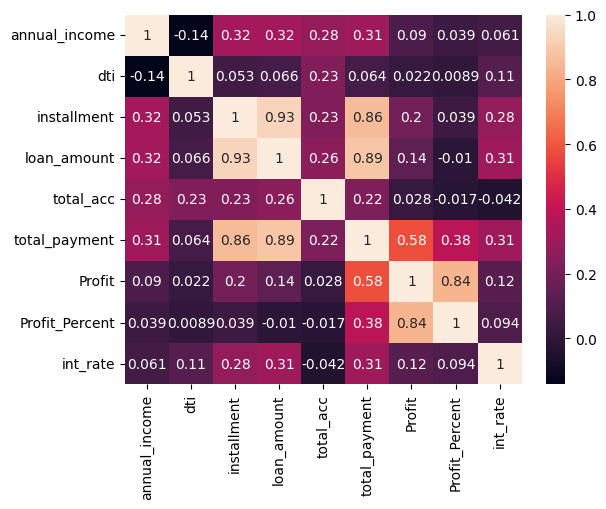

In [61]:
numerical_columns1a = ['annual_income','dti','installment','loan_amount','total_acc','total_payment','Profit','Profit_Percent', 'int_rate',]

sns.heatmap(merged_df[numerical_columns1a].corr(), annot = True)

Based on the analysis, it appears that only the variables 'loan amount', 'total payment', and 'loan amount' exhibit moderate correlations ranging from 0.28 to 0.31 with the 'Profit' variable. Conversely, the correlations for the remaining numerical variables are closer to 0, indicating weaker associations with 'Profit'.

## 4d) DTI 

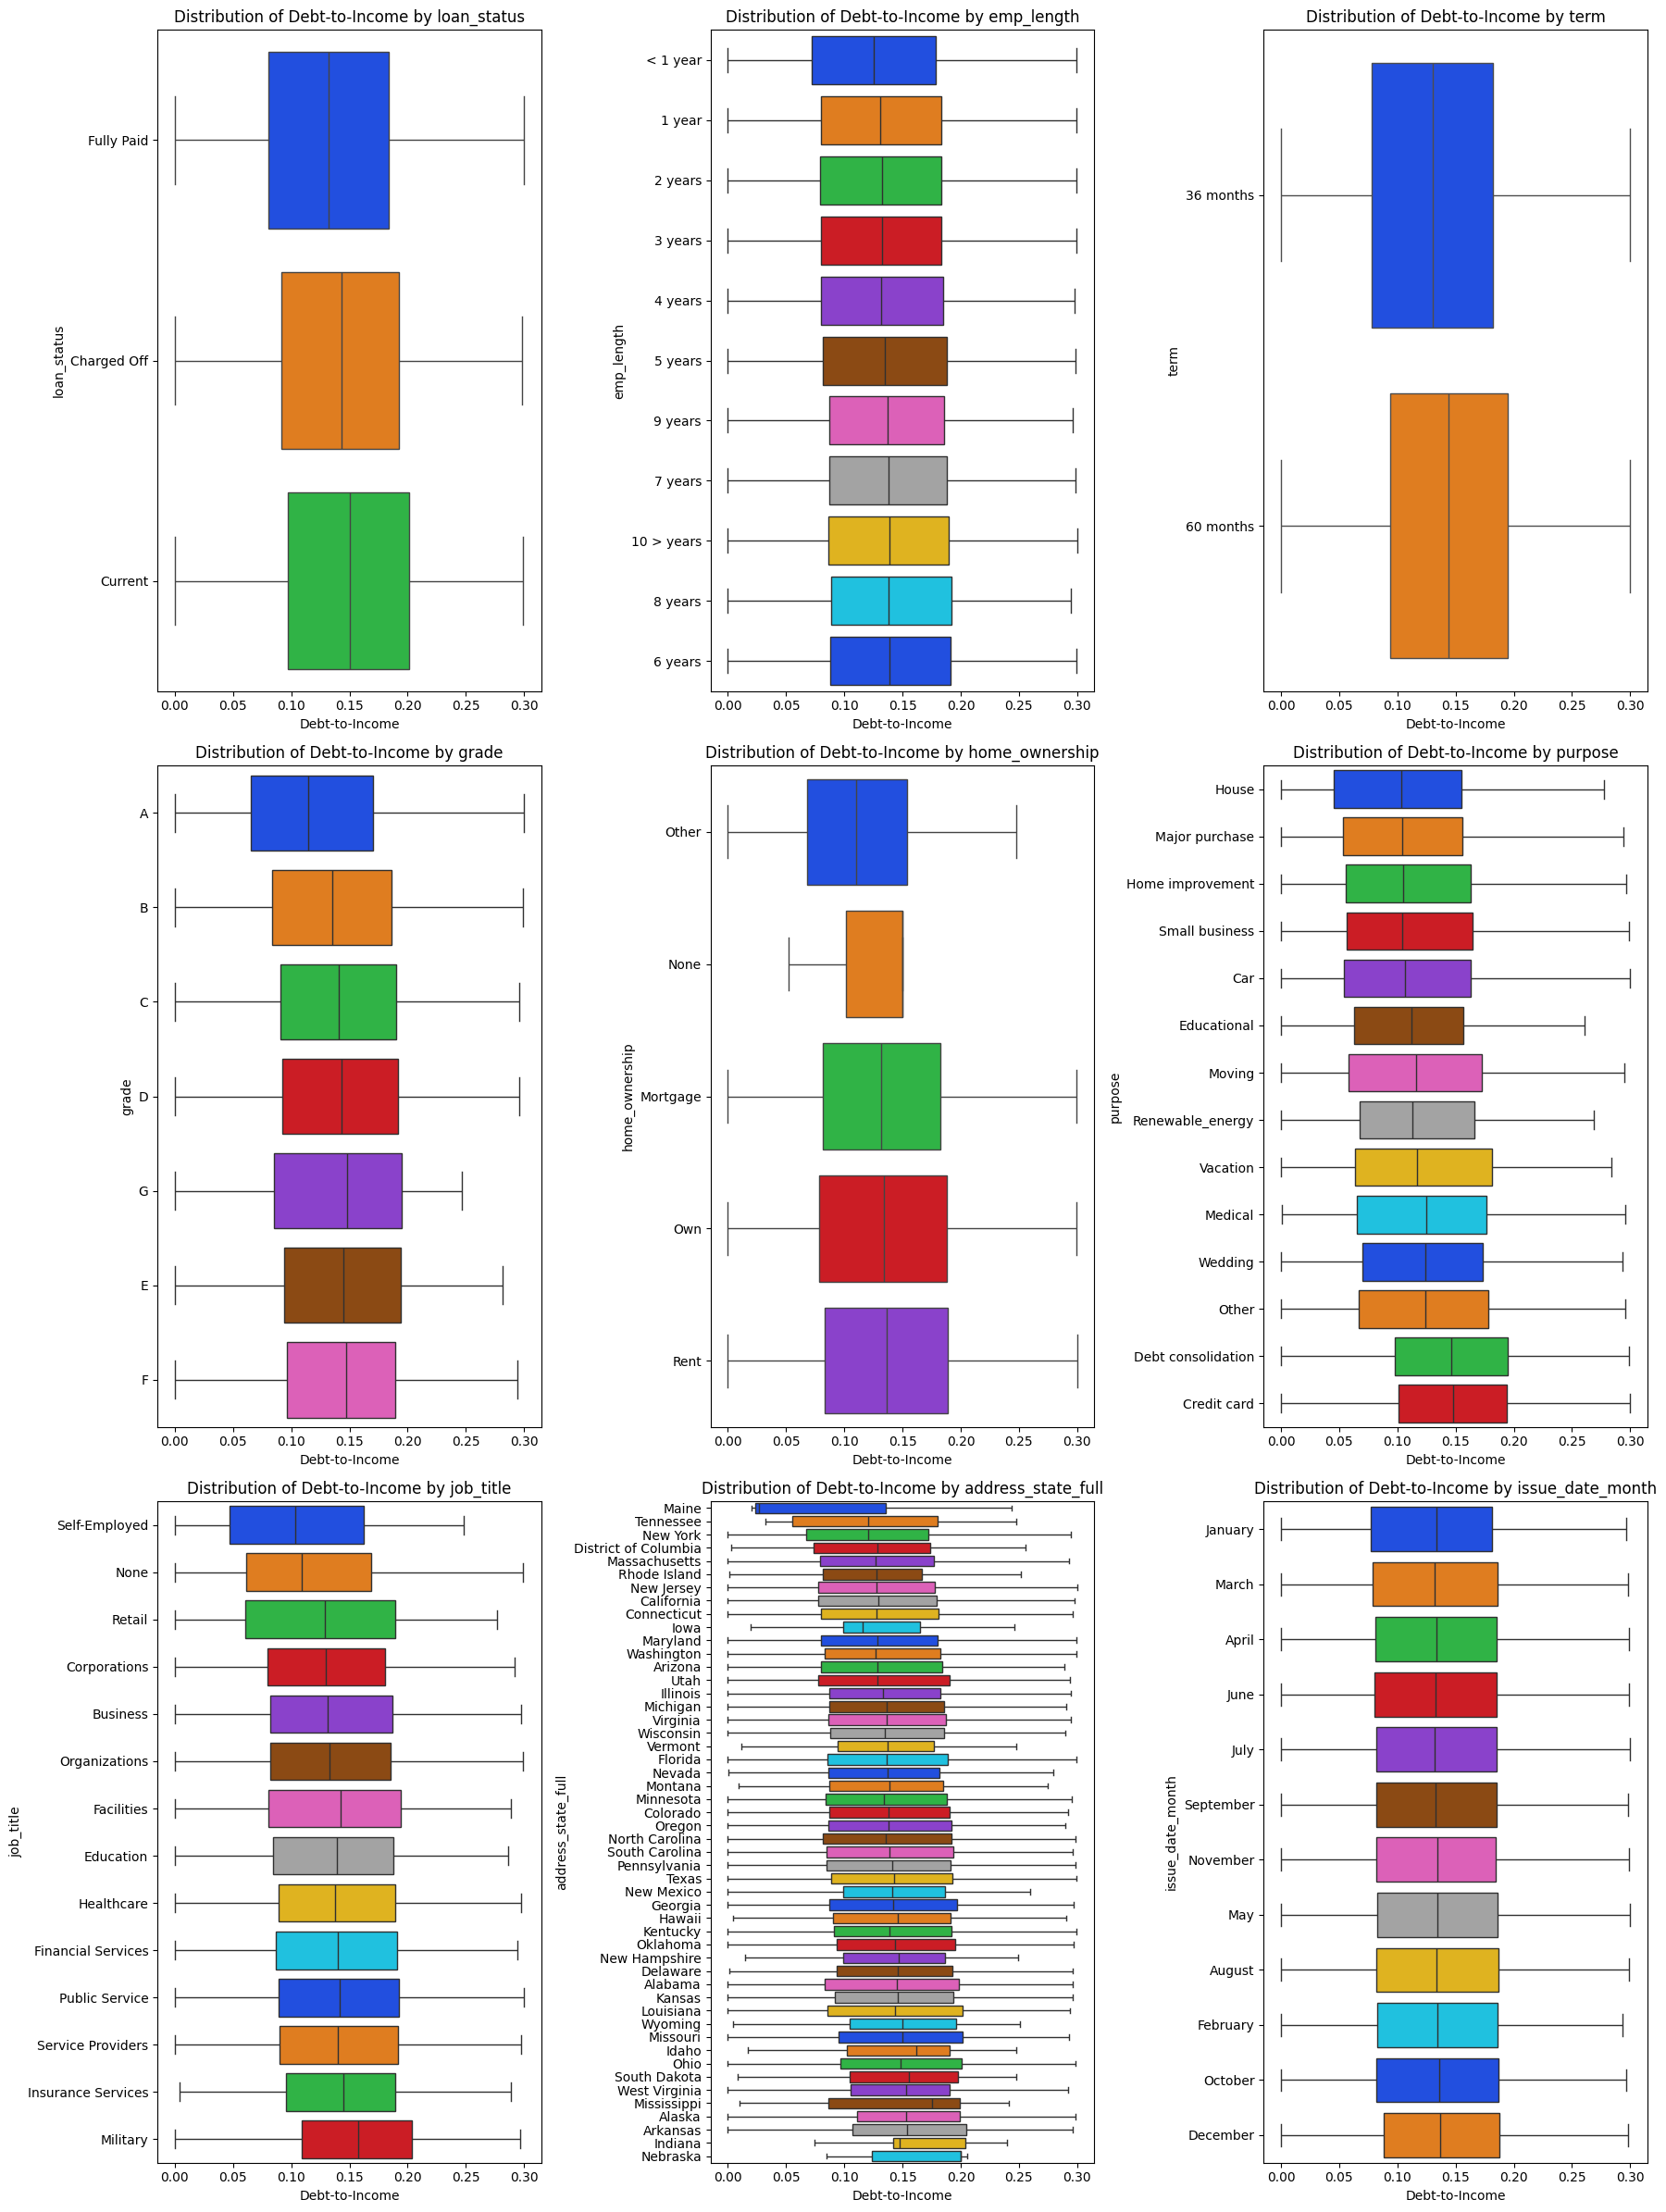

In [62]:
categorical_columns2 = ['loan_status', 'emp_length', 'term', 'grade', 'home_ownership', 'purpose', 'job_title', 
                       'address_state_full','issue_date_month']

plt.figure(figsize=(18, 24)) 

for i, column in enumerate(categorical_columns2, start=1):
    
    mean_interest_rates = merged_df.groupby(column)['dti'].mean().sort_values()
    sorted_order = mean_interest_rates.index.tolist()
    plt.subplot(3, 3, i) 
    sns.boxplot(x='dti', y=column, data=merged_df, palette='bright', order = sorted_order) 
    plt.ylabel(column) 
    plt.xlabel('Debt-to-Income') 
    plt.title(f'Distribution of Debt-to-Income by {column}') 
plt.tight_layout() 
plt.show()  

A higher Debt-to-Income (DTI) ratio typically signals an elevated level of financial risk. This metric reflects the proportion of an individual's income that is allocated toward debt payments, and a higher DTI ratio suggests that a larger share of income is committed to servicing debt, potentially straining financial resources.

Furthermore, the relationship between DTI ratio and risk is often intensified by other factors. For instance, in the context of lending, higher-risk borrower categories, such as those with lower credit grades, tend to exhibit elevated DTI ratios. Similarly, specific loan purposes, such as credit card usage, may be associated with higher DTI ratios due to revolving credit structures and potentially accumulated balances.

Additionally, when examining DTI ratios across different career categories, certain occupations, such as military service, may demonstrate higher DTI ratios, possibly influenced by factors such as salary structures or deployment-related expenses.

Moreover, geographical variations in DTI ratios can also provide insights into regional risk profiles. For example, observations indicating higher DTI ratios in states like Nebraska may reflect local economic conditions or cost-of-living factors, contributing to increased financial risk within those regions.

# 5 Feature Selection

## Chi-Square (Categorical - Categorical)

Null Hypothesis (H0): There is no association between the features and loan status.  
Alternative Hypothesis (H1): There is an association between the features and loan status.

In [63]:
from scipy.stats import chi2_contingency

categorical_column_final = ['emp_length', 'term', 'grade', 'sub_grade','home_ownership', 'purpose', 'job_title', 'address_state_full','issue_date_month']

alpha = 0.05
for i in categorical_column_final:
    contingency_table = pd.crosstab(merged_df[i], merged_df['loan_status'])

    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value > alpha:
        print("Null hypothesis (H0) accepted - {} of P-value {}:".format(i,p_value))
    else:
        print("Null hypothesis (H0) rejected - {} of P-value {}:".format(i,p_value))
        


Null hypothesis (H0) rejected - emp_length of P-value 3.9608166094808135e-22:
Null hypothesis (H0) rejected - term of P-value 0.0:
Null hypothesis (H0) rejected - grade of P-value 0.0:
Null hypothesis (H0) rejected - sub_grade of P-value 0.0:
Null hypothesis (H0) rejected - home_ownership of P-value 3.059640193262978e-14:
Null hypothesis (H0) rejected - purpose of P-value 1.0709459831722357e-76:
Null hypothesis (H0) rejected - job_title of P-value 1.0921748503934992e-09:
Null hypothesis (H0) rejected - address_state_full of P-value 4.370303229951842e-12:
Null hypothesis (H0) rejected - issue_date_month of P-value 4.175160260606469e-87:



This implies that all categorical features are significant, as evidenced by their p-values being below 0.05, indicating an impact on the target variable.

## ANOVA (Numerical - Categorical)

Null Hypothesis (H0): There is no association between the features and loan status.  
Alternative Hypothesis (H1): There is an association between the features and loan status.

In [64]:
numerical_columns2 = ['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment', 'Profit', 'Profit_Percent']

alpha = 0.05

for feature in numerical_columns2:
    groups = [merged_df[merged_df['loan_status'] == category][feature] for category in merged_df['loan_status'].unique()]
    
    f_statistic, p_value = f_oneway(*groups)
    
    if p_value > alpha:
        print("Null hypothesis (H0) accepted: '{}' (P-value: {})".format(feature, p_value))
    else:
        print("Null hypothesis (H0) rejected: '{}' (P-value: {})".format(feature, p_value))

Null hypothesis (H0) rejected: 'annual_income' (P-value: 2.3672589590832745e-20)
Null hypothesis (H0) rejected: 'dti' (P-value: 3.524199199505647e-27)
Null hypothesis (H0) rejected: 'installment' (P-value: 7.046060098689188e-38)
Null hypothesis (H0) rejected: 'int_rate' (P-value: 0.0)
Null hypothesis (H0) rejected: 'loan_amount' (P-value: 1.619519140461805e-188)
Null hypothesis (H0) rejected: 'total_acc' (P-value: 9.964871241643653e-07)
Null hypothesis (H0) rejected: 'total_payment' (P-value: 0.0)
Null hypothesis (H0) rejected: 'Profit' (P-value: 0.0)
Null hypothesis (H0) rejected: 'Profit_Percent' (P-value: 0.0)


In [65]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

# Define your list of numerical columns
numerical_columns2 = ['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment', 'Profit', 'Profit_Percent']

# Set the significance level
alpha = 0.05

# Initialize SelectKBest with f_classif as the scoring function
selector = SelectKBest(score_func=f_classif, k='all')

# Prepare data for SelectKBest
X = merged_df[numerical_columns2].values
y = merged_df['loan_status'].values

# Fit SelectKBest with the data
selector.fit(X, y)

# Get selected features
selected_features_indices = selector.get_support(indices=True)

# Get p-values
p_values = selector.pvalues_

# Print selected features and their p-values
print("Selected features and their p-values:")
for i, feature_idx in enumerate(selected_features_indices):
    feature_name = numerical_columns2[feature_idx]
    p_value = p_values[feature_idx]
    print(" - {}: p-value = {}".format(feature_name, p_value))


Selected features and their p-values:
 - annual_income: p-value = 2.367258959077791e-20
 - dti: p-value = 3.524199199527934e-27
 - installment: p-value = 7.046060098781008e-38
 - int_rate: p-value = 0.0
 - loan_amount: p-value = 1.6195191404688934e-188
 - total_acc: p-value = 9.964871241666914e-07
 - total_payment: p-value = 0.0
 - Profit: p-value = 0.0
 - Profit_Percent: p-value = 0.0


In [66]:
merged_df.columns

Index(['id', 'address_state', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'purpose',
       'sub_grade', 'term', 'annual_income', 'dti', 'installment', 'int_rate',
       'loan_amount', 'total_acc', 'total_payment', 'Term_Mnths', 'Profit',
       'Profit_Percent', 'Cluster', 'job_title', 'address_state_full',
       'Latitude', 'Longitude', 'issue_date_month'],
      dtype='object')

In [69]:
ml_testing_df = merged_df[['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount','total_acc', 'total_payment', 'emp_length', 
                          'term', 'grade', 'purpose','job_title', 'issue_date_month', 'address_state_full', 'sub_grade','home_ownership']]
ml_testing_df.head(1)

annual_income   dti  installment  int_rate  loan_amount  total_acc  \
0        30000.0  0.01    59.830002    0.1527       2500.0          4   

   total_payment emp_length       term grade purpose      job_title  \
0           1009   < 1 year  60 months     C     Car  Organizations   

  issue_date_month address_state_full sub_grade home_ownership  
0         February            Georgia        C4           Rent

# 6) Prepare for Machine learning

In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
scaler = StandardScaler()

In [65]:
def mapping(x):
    if x == '10 > years':
        return '11 years'
    if x == '< 1 year':
        return '0 year'
    else:
        return x
    
merged_df['emp_length'] = merged_df['emp_length'].apply(mapping)

In [66]:
merged_df['loan_statuss'] = merged_df['loan_status'].apply(lambda x: 'paid' if x in ['Current', 'Fully Paid'] else 'Charged Off')

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to convert the target variable into numerical labels
merged_df['label'] = le.fit_transform(merged_df['loan_statuss'])

# Display the mapping of original labels to encoded labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

# Display the first few rows of the DataFrame
merged_df.head(1)

Label Mapping: {'Charged Off': 0, 'paid': 1}


id address_state emp_length emp_title grade home_ownership issue_date  \
0  1077430            GA     0 year     RYDER     C           Rent 2021-02-11   

  last_credit_pull_date last_payment_date  loan_status next_payment_date  \
0            2021-09-13        2021-04-13  Charged Off        2021-05-13   

  purpose sub_grade       term  annual_income   dti  installment  int_rate  \
0     Car        C4  60 months        30000.0  0.01    59.830002    0.1527   

   loan_amount  total_acc  total_payment  Term_Mnths  Profit  Profit_Percent  \
0       2500.0          4           1009        60.0 -1491.0          -59.64   

   Cluster      job_title address_state_full  Latitude  Longitude  \
0       11  Organizations            Georgia   32.1574    82.9071   

  issue_date_month loan_statuss  label  
0         February  Charged Off      0

## Convert Categorical Features to One-Hot Encoding

In [67]:
final_df = pd.get_dummies(merged_df, columns=categorical_column_final, dtype=int)
final_df = final_df.drop(['id', 'address_state', 'emp_title', 'issue_date', 'last_credit_pull_date', 'last_payment_date', 'next_payment_date', 'loan_status',
                         'Cluster','Latitude','Longitude', 'Term_Mnths', 'loan_statuss', 'label',
                          'Profit','Profit_Percent'], axis=1)

In [68]:
final_df.head()

annual_income     dti  installment  int_rate  loan_amount  total_acc  \
0        30000.0  0.0100    59.830002    0.1527       2500.0          4   
1        48000.0  0.0535   109.430000    0.1864       3000.0          4   
2        50000.0  0.2088   421.649994    0.1596      12000.0         11   
3        42000.0  0.0540    97.059998    0.1065       4500.0          9   
4        83000.0  0.0231   106.529999    0.0603       3500.0         28   

   total_payment  emp_length_0 year  emp_length_1 year  emp_length_11 years  \
0           1009                  1                  0                    0   
1           3939                  0                  0                    0   
2           3522                  0                  0                    0   
3           4911                  1                  0                    0   
4           3835                  0                  0                    1   

   emp_length_2 years  emp_length_3 years  emp_length_4 years  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   1   
3                   0                   0                   0   
4                   0                   0                   0   

   emp_length_5 years  emp_length_6 years  emp_length_7 years  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   emp_length_8 years  emp_length_9 years  term_36 months  term_60 months  \
0                   0                   0               0               1   
1                   0                   1               1               0   
2                   0                   0               1               0   
3                   0                   0               0               1   
4                   0                   0               1               0   

   grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0        0        0        1        0        0        0        0   
1        0        0        0        0        1        0        0   
2        0        0        1        0        0        0        0   
3        0        1        0        0        0        0        0   
4        1        0        0        0        0        0        0   

   sub_grade_A1  sub_grade_A2  sub_grade_A3  sub_grade_A4  sub_grade_A5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   sub_grade_B1  sub_grade_B2  sub_grade_B3  sub_grade_B4  sub_grade_B5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             1             0             0             0   
4             0             0             0             0             0   

   sub_grade_C1  sub_grade_C2  sub_grade_C3  sub_grade_C4  sub_grade_C5  \
0             0             0             0             1             0   
1             0             0             0             0             0   
2             0             0             0             0             1   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_D1  sub_grade_D2  sub_grade_D3  sub_grade_D4  sub_grade_D

In [69]:
numerical_columns2 = ['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc','total_payment']

X = final_df
y = merged_df['label']

random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

X_train_numerical = X_train[numerical_columns2]
X_test_numerical = X_test[numerical_columns2]

X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

X_train[numerical_columns2] = X_train_scaled
X_test[numerical_columns2] = X_test_scaled

# ################# Before SMOTE ############################
y_train_df = pd.Series(y_train)
y_train_df.value_counts()

label
1    26590
0     4266
Name: count, dtype: int64

In [70]:
X_train.shape

(30856, 157)

In [71]:
X_train.head()

annual_income       dti  installment  int_rate  loan_amount  total_acc  \
26462      -0.501357 -1.552738    -0.779960 -0.284053    -0.843807  -0.801448   
30486      -0.253432  0.693618    -1.406709 -0.205830    -1.381477   0.076901   
30257      -0.116721 -0.360763    -0.990714  0.873103    -0.843807   3.063286   
12541       0.652552  1.692663     2.564680  0.686987     1.844548   1.921433   
10734      -0.537989  0.874583    -0.964645 -1.122924    -0.978224  -1.152787   

       total_payment  emp_length_0 year  emp_length_1 year  \
26462      -0.707693                  0                  0   
30486      -1.225206                  0                  0   
30257      -0.605963                  0                  0   
12541       1.903812                  1                  0   
10734      -0.856963                  0                  0   

       emp_length_11 years  emp_length_2 years  emp_length_3 years  \
26462                    0                   0                   0   
30486                    1                   0                   0   
30257                    1                   0                   0   
12541                    0                   0                   0   
10734                    0                   1                   0   

       emp_length_4 years  emp_length_5 years  emp_length_6 years  \
26462                   0                   0                   0   
30486                   0                   0                   0   
30257                   0                   0                   0   
12541                   0                   0                   0   
10734                   0                   0                   0   

       emp_length_7 years  emp_length_8 years  emp_length_9 years  \
26462                   1                   0                   0   
30486                   0                   0                   0   
30257                   0                   0                   0   
12541                   0                   0                   0   
10734                   0                   0                   0   

       term_36 months  term_60 months  grade_A  grade_B  grade_C  grade_D  \
26462               1               0        0        1        0        0   
30486               1               0        0        0        1        0   
30257               0               1        0        0        0        1   
12541               1               0        0        0        0        1   
10734               1               0        1        0        0        0   

       grade_E  grade_F  grade_G  sub_grade_A1  sub_grade_A2  sub_grade_A3  \
26462        0        0        0             0             0             0   
30486        0        0        0             0             0             0   
30257        0        0        0             0             0             0   
12541        0        0        0             0             0             0   
10734        0        0        0             0             0             0   

       sub_grade_A4  sub_grade_A5  sub_grade_B1  sub_grade_B2  sub_grade_B3  \
26462             0             0             0             0             1   
30486             0             0             0             0             0   
30257             0             0             0             0             0   
12541             0             0             0             0             0   
10734             0             1             0             0             0   

       sub_grade_B4  sub_grade_B5  sub_grade_C1  sub_grade_C2  sub_grade_C3  \
26462             0             0             0             0             0   
30486             0             0             1             0             0   
30257             0             0             0             0             0   
12541             0             0             0             0             0   
10734             0             0             0             0             0   

       sub_gra

# 7) Machine Learning

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV

svm = SVC(random_state = random_state)
lg = LogisticRegression(random_state = random_state)
gb = GradientBoostingClassifier(random_state = random_state)
rf = RandomForestClassifier(random_state = random_state)
et = ExtraTreesClassifier(random_state = random_state)
xgb = XGBClassifier(random_state = random_state)
lgm = LGBMClassifier(verbose= -1, random_state = random_state)
cat = CatBoostClassifier(logging_level='Silent', random_state = random_state)
MLP = MLPClassifier(random_state = random_state)

In [73]:
def find_metrics(model, train_x, train_y):
    model.fit(train_x, train_y)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    auc_score = auc(fpr, tpr)
    return precision,recall,f1,auc_score, y_pred

In [74]:
def find_metrics_svm(model, train_x, train_y):
    model.fit(train_x, train_y)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    scores = model.decision_function(X_test)
    probs = (scores - scores.min()) / (scores.max() - scores.min())
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    auc_score = auc(fpr, tpr)
    
    return precision,recall,f1,auc_score, y_pred

# 7a Baseline

# SVM - Baseline

In [75]:
precision_svm_no,recall_svm_no, f1_svm_no, auc_svm_no, y_pred_svm_no = find_metrics_svm(svm, X_train, y_train)
print('Precision:', precision_svm_no)
print('Recall:', recall_svm_no)
print('F1 Score :', f1_svm_no)
print('AUC Score:', auc_svm_no)
print(classification_report(y_test, y_pred_svm_no))

Precision: 0.9625971756937975
Recall: 0.9611147116007777
F1 Score : 0.9584287286854485
AUC Score: 0.970057444819252
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      1067
           1       0.96      1.00      0.98      6648

    accuracy                           0.96      7715
   macro avg       0.98      0.86      0.91      7715
weighted avg       0.96      0.96      0.96      7715



# Logistic Regression - Baseline

In [76]:
precision_lg_no, recall_lg_no, f1_lg_no, auc_lg_no , y_pred_lg_no = find_metrics(lg, X_train, y_train)
print('Precision:', precision_lg_no)
print('Recall:', recall_lg_no)
print('F1 Score :', f1_lg_no)
print('AUC Score:', auc_lg_no)
print(classification_report(y_test, y_pred_lg_no))

Precision: 0.957499534862326
Recall: 0.9578742709008425
F1 Score : 0.9556116693482839
AUC Score: 0.9519712364254401
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      1067
           1       0.96      0.99      0.98      6648

    accuracy                           0.96      7715
   macro avg       0.95      0.87      0.90      7715
weighted avg       0.96      0.96      0.96      7715



# Gradient Boosting - Baseline

In [77]:
precision_gb_no, recall_gb_no, f1_gb_no, auc_gb_no, y_pred_gb_no = find_metrics(gb, X_train, y_train)
print('Precision:', precision_gb_no)
print('Recall:', recall_gb_no)
print('F1 Score :', f1_gb_no)
print('AUC Score:', auc_gb_no)
print(classification_report(y_test, y_pred_gb_no))

Precision: 0.9643388642179364
Recall: 0.9631885936487362
F1 Score : 0.9608688802754124
AUC Score: 0.9760529341575341
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1067
           1       0.96      1.00      0.98      6648

    accuracy                           0.96      7715
   macro avg       0.98      0.87      0.91      7715
weighted avg       0.96      0.96      0.96      7715



# Random Forest - Baseline

In [78]:
precision_rf_no, recall_rf_no, f1_rf_no, auc_rf_no, y_pred_rf_no = find_metrics(rf, X_train, y_train)
print('Precision:', precision_rf_no)
print('Recall:', recall_rf_no)
print('F1 Score :', f1_rf_no)
print('AUC Score:', auc_rf_no)
print(classification_report(y_test, y_pred_rf_no))

Precision: 0.9375296960105146
Recall: 0.9329876863253402
F1 Score : 0.9236286920154834
AUC Score: 0.9487957565156194
              precision    recall  f1-score   support

           0       1.00      0.52      0.68      1067
           1       0.93      1.00      0.96      6648

    accuracy                           0.93      7715
   macro avg       0.96      0.76      0.82      7715
weighted avg       0.94      0.93      0.92      7715



# Extra Tree - Baseline

In [79]:
precision_et_no, recall_et_no, f1_et_no, auc_et_no, y_pred_et_no = find_metrics(et, X_train, y_train)
print('Precision:', precision_et_no)
print('Recall:', recall_et_no)
print('F1 Score :', f1_et_no)
print('AUC Score:', auc_et_no)
print(classification_report(y_test, y_pred_et_no))

Precision: 0.8976542902375332
Recall: 0.8913804277381724
F1 Score : 0.861148077112036
AUC Score: 0.9052863951585526
              precision    recall  f1-score   support

           0       0.95      0.23      0.37      1067
           1       0.89      1.00      0.94      6648

    accuracy                           0.89      7715
   macro avg       0.92      0.61      0.65      7715
weighted avg       0.90      0.89      0.86      7715



# XGB - Baseline

In [80]:
precision_xgb_no, recall_xgb_no, f1_xgb_no, auc_xgb_no, y_pred_xgb_no = find_metrics(xgb, X_train, y_train)
print('Precision:', precision_xgb_no)
print('Recall:', recall_xgb_no)
print('F1 Score :', f1_xgb_no)
print('AUC Score:', auc_xgb_no)
print(classification_report(y_test, y_pred_xgb_no))

Precision: 0.975600498267017
Recall: 0.9756318859364873
F1 Score : 0.9749033906382217
AUC Score: 0.978644774252631
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1067
           1       0.98      1.00      0.99      6648

    accuracy                           0.98      7715
   macro avg       0.97      0.92      0.95      7715
weighted avg       0.98      0.98      0.97      7715



# LGM - Baseline

In [81]:
precision_lgm_no, recall_lgm_no, f1_lgm_no, auc_lgm_no, y_pred_lgm_no = find_metrics(lgm, X_train, y_train)
print('Precision:', precision_lgm_no)
print('Recall:', recall_lgm_no)
print('F1 Score :', f1_lgm_no)
print('AUC Score:', auc_lgm_no)
print(classification_report(y_test, y_pred_lgm_no))

Precision: 0.9759281098673093
Recall: 0.9756318859364873
F1 Score : 0.9747544073565816
AUC Score: 0.9795135376241856
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1067
           1       0.97      1.00      0.99      6648

    accuracy                           0.98      7715
   macro avg       0.98      0.92      0.95      7715
weighted avg       0.98      0.98      0.97      7715



# CAT - Baseline

In [82]:
precision_cat_no, recall_cat_no, f1_cat_no, auc_cat_no, y_pred_cat_no = find_metrics(cat, X_train, y_train)
print('Precision:', precision_cat_no)
print('Recall:', recall_cat_no)
print('F1 Score :', f1_cat_no)
print('AUC Score:', auc_cat_no)
print(classification_report(y_test, y_pred_cat_no))

Precision: 0.97599695280972
Recall: 0.97550226830849
F1 Score : 0.9745434731053539
AUC Score: 0.9832051299402148
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1067
           1       0.97      1.00      0.99      6648

    accuracy                           0.98      7715
   macro avg       0.98      0.91      0.94      7715
weighted avg       0.98      0.98      0.97      7715



# Deep Learning - Baseline

In [83]:
precision_MLP_no, recall_MLP_no, f1_MLP_no, auc_MLP_no, y_pred_MLP_no = find_metrics(MLP, X_train, y_train)
print('Precision:', precision_MLP_no)
print('Recall:', recall_MLP_no)
print('F1 Score :', f1_MLP_no)
print('AUC Score:', auc_MLP_no)
print(classification_report(y_test, y_pred_MLP_no))

Precision: 0.9616559348587346
Recall: 0.9625405055087491
F1 Score : 0.9617842646518647
AUC Score: 0.9607908234904029
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1067
           1       0.97      0.99      0.98      6648

    accuracy                           0.96      7715
   macro avg       0.94      0.90      0.92      7715
weighted avg       0.96      0.96      0.96      7715



In [84]:
model_df_no = pd.DataFrame({
    'Model': ['SVM_Baseline', 'Logistic Regression_Baseline', 'Gradient Boosting_Baseline', 'Random Forest_Baseline', 'Extra Tree_Baseline', 'XGB_Baseline', 'LGM_Baseline', 'CAT_Baseline', 'Deep Learning_Baseline'],
    'Precision': [precision_svm_no, precision_lg_no, precision_gb_no, precision_rf_no,  precision_et_no, precision_xgb_no, precision_lgm_no, precision_cat_no, precision_MLP_no],
    'Recall': [recall_svm_no, recall_lg_no, recall_gb_no, recall_rf_no, recall_et_no, recall_xgb_no, recall_lgm_no, recall_cat_no, recall_MLP_no],
    'F1': [f1_svm_no, f1_lg_no, f1_gb_no, f1_rf_no, f1_et_no, f1_xgb_no, f1_lgm_no, f1_cat_no, f1_MLP_no],
    'AUC': [auc_svm_no, auc_lg_no, auc_gb_no, auc_rf_no, auc_et_no, auc_xgb_no, auc_lgm_no, auc_cat_no, auc_MLP_no]
})

model_df_no.sort_values(by = 'F1', ascending = False)

Model  Precision    Recall        F1       AUC
5                  XGB_Baseline   0.975600  0.975632  0.974903  0.978645
6                  LGM_Baseline   0.975928  0.975632  0.974754  0.979514
7                  CAT_Baseline   0.975997  0.975502  0.974543  0.983205
8        Deep Learning_Baseline   0.961656  0.962541  0.961784  0.960791
2    Gradient Boosting_Baseline   0.964339  0.963189  0.960869  0.976053
0                  SVM_Baseline   0.962597  0.961115  0.958429  0.970057
1  Logistic Regression_Baseline   0.957500  0.957874  0.955612  0.951971
3        Random Forest_Baseline   0.937530  0.932988  0.923629  0.948796
4           Extra Tree_Baseline   0.897654  0.891380  0.861148  0.905286

# 7b) Apply Under Sampling on Training datasets

In [85]:
from imblearn.under_sampling import TomekLinks

In [86]:
RUS = TomekLinks()
X_train_resampled, y_train_resampled = RUS.fit_resample(X_train, y_train)

In [87]:
################# After TomekLinks ############################
y_train_rus = pd.Series(y_train_resampled)
y_train_rus.value_counts()

label
1    25716
0     4266
Name: count, dtype: int64

# SVM - Tomek

In [88]:
precision_svm_rus,recall_svm_rus, f1_svm_rus, auc_svm_rus, y_pred_svm_rus = find_metrics_svm(svm, X_train_resampled, y_train_resampled)
print('Precision:', precision_svm_rus)
print('Recall:', recall_svm_rus)
print('F1 Score :', f1_svm_rus)
print('AUC Score:', auc_svm_rus)
print(classification_report(y_test, y_pred_svm_rus))

Precision: 0.9632529567255749
Recall: 0.9618924173687622
F1 Score : 0.9593448373829377
AUC Score: 0.9706719583343201
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1067
           1       0.96      1.00      0.98      6648

    accuracy                           0.96      7715
   macro avg       0.98      0.86      0.91      7715
weighted avg       0.96      0.96      0.96      7715



# Logistic Regression - Tomek

In [89]:
precision_lg_rus,recall_lg_rus, f1_lg_rus, auc_lg_rus, y_pred_lg_rus = find_metrics(lg, X_train_resampled, y_train_resampled)
print('Precision:', precision_lg_rus)
print('Recall:', recall_lg_rus)
print('F1 Score :', f1_lg_rus)
print('AUC Score:', auc_lg_rus)
print(classification_report(y_test, y_pred_lg_rus))

Precision: 0.9570793285109512
Recall: 0.9576150356448477
F1 Score : 0.9554263107221125
AUC Score: 0.952282510993293
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1067
           1       0.96      0.99      0.98      6648

    accuracy                           0.96      7715
   macro avg       0.95      0.87      0.90      7715
weighted avg       0.96      0.96      0.96      7715



# Gradient Boosting - Tomek

In [90]:
precision_gb_rus,recall_gb_rus, f1_gb_rus, auc_gb_rus, y_pred_gb_rus = find_metrics(gb, X_train_resampled, y_train_resampled)
print('Precision:', precision_gb_rus)
print('Recall:', recall_gb_rus)
print('F1 Score :', f1_gb_rus)
print('AUC Score:', auc_gb_rus)
print(classification_report(y_test, y_pred_gb_rus))

Precision: 0.9632526267124433
Recall: 0.9620220349967595
F1 Score : 0.9595354426843596
AUC Score: 0.9754821231406702
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1067
           1       0.96      1.00      0.98      6648

    accuracy                           0.96      7715
   macro avg       0.98      0.87      0.91      7715
weighted avg       0.96      0.96      0.96      7715



# Random Forest - Tomek

In [91]:
precision_rf_rus, recall_rf_rus, f1_rf_rus, auc_rf_rus, y_pred_rf_rus = find_metrics(rf, X_train_resampled, y_train_resampled)
print('Precision:', precision_rf_rus)
print('Recall:', recall_rf_rus)
print('F1 Score :', f1_rf_rus)
print('AUC Score:', auc_rf_rus)
print(classification_report(y_test, y_pred_rf_rus))

Precision: 0.9409197824750558
Recall: 0.9368762151652624
F1 Score : 0.9287491343048093
AUC Score: 0.9481218921884744
              precision    recall  f1-score   support

           0       1.00      0.55      0.71      1067
           1       0.93      1.00      0.96      6648

    accuracy                           0.94      7715
   macro avg       0.96      0.77      0.83      7715
weighted avg       0.94      0.94      0.93      7715



# Extra Tree - Tomek

In [92]:
precision_et_rus, recall_et_rus, f1_et_rus, auc_et_rus, y_pred_et_rus = find_metrics(et, X_train_resampled, y_train_resampled)
print('Precision:', precision_et_rus)
print('Recall:', recall_et_rus)
print('F1 Score :', f1_et_rus)
print('AUC Score:', auc_et_rus)
print(classification_report(y_test, y_pred_et_rus))

Precision: 0.895022810501692
Recall: 0.8903434867141932
F1 Score : 0.8598225217622703
AUC Score: 0.8981707121082423
              precision    recall  f1-score   support

           0       0.93      0.22      0.36      1067
           1       0.89      1.00      0.94      6648

    accuracy                           0.89      7715
   macro avg       0.91      0.61      0.65      7715
weighted avg       0.90      0.89      0.86      7715



# XGB - Tomek

In [93]:
precision_xgb_rus, recall_xgb_rus, f1_xgb_rus, auc_xgb_rus, y_pred_xgb_rus = find_metrics(xgb, X_train_resampled, y_train_resampled)
print('Precision:', precision_xgb_rus)
print('Recall:', recall_xgb_rus)
print('F1 Score :', f1_xgb_rus)
print('AUC Score:', auc_xgb_rus)
print(classification_report(y_test, y_pred_xgb_rus))

Precision: 0.9775801464314621
Recall: 0.9774465327284511
F1 Score : 0.976751350028543
AUC Score: 0.9792573845943902
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1067
           1       0.98      1.00      0.99      6648

    accuracy                           0.98      7715
   macro avg       0.98      0.92      0.95      7715
weighted avg       0.98      0.98      0.98      7715



# LGM - Tomek

In [94]:
precision_lgm_rus, recall_lgm_rus, f1_lgm_rus, auc_lgm_rus, y_pred_lgm_rus = find_metrics(lgm, X_train_resampled, y_train_resampled)
print('Precision:', precision_lgm_rus)
print('Recall:', recall_lgm_rus)
print('F1 Score :', f1_lgm_rus)
print('AUC Score:', auc_lgm_rus)
print(classification_report(y_test, y_pred_lgm_rus))

Precision: 0.9770831435731633
Recall: 0.976798444588464
F1 Score : 0.9760015969035172
AUC Score: 0.9802769215847484
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1067
           1       0.98      1.00      0.99      6648

    accuracy                           0.98      7715
   macro avg       0.98      0.92      0.95      7715
weighted avg       0.98      0.98      0.98      7715



# CAT - Tomek

In [95]:
precision_cat_rus, recall_cat_rus, f1_cat_rus, auc_cat_rus, y_pred_cat_rus = find_metrics(cat, X_train_resampled, y_train_resampled)
print('Precision:', precision_cat_rus)
print('Recall:', recall_cat_rus)
print('F1 Score :', f1_cat_rus)
print('AUC Score:', auc_cat_rus)
print(classification_report(y_test, y_pred_cat_rus))

Precision: 0.9753090320969797
Recall: 0.9748541801685029
F1 Score : 0.9738639170186663
AUC Score: 0.983642859801258
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1067
           1       0.97      1.00      0.99      6648

    accuracy                           0.97      7715
   macro avg       0.98      0.91      0.94      7715
weighted avg       0.98      0.97      0.97      7715



# Deep Learning - Tomek

In [96]:
precision_MLP_rus, recall_MLP_rus, f1_MLP_rus, auc_MLP_rus, y_pred_MLP_rus = find_metrics(MLP, X_train_resampled, y_train_resampled)
print('Precision:', precision_MLP_rus)
print('Recall:', recall_MLP_rus)
print('F1 Score :', f1_MLP_rus)
print('AUC Score:', auc_MLP_rus)
print(classification_report(y_test, y_pred_MLP_rus))

Precision: 0.9604587463018148
Recall: 0.9612443292287751
F1 Score : 0.9606968800893615
AUC Score: 0.9601279552757093
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1067
           1       0.97      0.98      0.98      6648

    accuracy                           0.96      7715
   macro avg       0.93      0.91      0.92      7715
weighted avg       0.96      0.96      0.96      7715



In [97]:
model_df_rus = pd.DataFrame({
    'Model': ['SVM_Tomek', 'Logistic Regression_Tomek', 'Gradient Boosting_Tomek',  'Random Forest_Tomek', 'Extra Tree_Tomek', 'XGB_Tomek', 'LGM_Tomek', 'CAT_Tomek', 'Deep Learning_Tomek'],
    'Precision': [precision_svm_rus, precision_lg_rus, precision_gb_rus,  precision_rf_rus,  precision_et_rus, precision_xgb_rus, precision_lgm_rus, precision_cat_rus, precision_MLP_rus],
    'Recall': [recall_svm_rus,  recall_lg_rus, recall_gb_rus, recall_rf_rus, recall_et_rus, recall_xgb_rus, recall_lgm_rus, recall_cat_rus, recall_MLP_rus],
    'F1': [f1_svm_rus, f1_lg_rus, f1_gb_rus, f1_rf_rus, f1_et_rus, f1_xgb_rus, f1_lgm_rus, f1_cat_rus, f1_MLP_rus],
    'AUC': [auc_svm_rus, auc_lg_rus, auc_gb_rus, auc_rf_rus, auc_et_rus, auc_xgb_rus, auc_lgm_rus, auc_cat_rus, auc_MLP_rus]
})

model_df_rus.sort_values(by = 'F1', ascending = False)

Model  Precision    Recall        F1       AUC
5                  XGB_Tomek   0.977580  0.977447  0.976751  0.979257
6                  LGM_Tomek   0.977083  0.976798  0.976002  0.980277
7                  CAT_Tomek   0.975309  0.974854  0.973864  0.983643
8        Deep Learning_Tomek   0.960459  0.961244  0.960697  0.960128
2    Gradient Boosting_Tomek   0.963253  0.962022  0.959535  0.975482
0                  SVM_Tomek   0.963253  0.961892  0.959345  0.970672
1  Logistic Regression_Tomek   0.957079  0.957615  0.955426  0.952283
3        Random Forest_Tomek   0.940920  0.936876  0.928749  0.948122
4           Extra Tree_Tomek   0.895023  0.890343  0.859823  0.898171

# Results of Baseline and Tomek

In [98]:
pd.concat([model_df_no, model_df_rus], axis = 0).sort_values(by = 'F1', ascending = False).head(7)

Model  Precision    Recall        F1       AUC
5               XGB_Tomek   0.977580  0.977447  0.976751  0.979257
6               LGM_Tomek   0.977083  0.976798  0.976002  0.980277
5            XGB_Baseline   0.975600  0.975632  0.974903  0.978645
6            LGM_Baseline   0.975928  0.975632  0.974754  0.979514
7            CAT_Baseline   0.975997  0.975502  0.974543  0.983205
7               CAT_Tomek   0.975309  0.974854  0.973864  0.983643
8  Deep Learning_Baseline   0.961656  0.962541  0.961784  0.960791

# 7c) Apply oversampling on Training datasets

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
smote = SMOTE(k_neighbors=7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [101]:
################# After SMOTE ############################
y_train_smote = pd.Series(y_train_resampled)
y_train_smote.value_counts()

label
1    26590
0    26590
Name: count, dtype: int64

# SVM - SMOTE

In [102]:
precision_svm_smote, recall_svm_smote,  f1_svm_smote, auc_svm_smote, y_pred_svm_smote = find_metrics_svm(svm, X_train_resampled, y_train_resampled)
print('Precision:', precision_svm_smote)
print('Recall:', recall_svm_smote)
print('F1 Score :', f1_svm_smote)
print('AUC Score:', auc_svm_smote)
print(classification_report(y_test, y_pred_svm_smote))

Precision: 0.9627167039040726
Recall: 0.9612443292287751
F1 Score : 0.9585781119824042
AUC Score: 0.9708852547207157
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      1067
           1       0.96      1.00      0.98      6648

    accuracy                           0.96      7715
   macro avg       0.98      0.86      0.91      7715
weighted avg       0.96      0.96      0.96      7715



# Logistic Regression - SMOTE

In [103]:
precision_lg_smote, recall_lg_smote, f1_lg_smote, auc_lg_smote, y_pred_lg_smote = find_metrics(lg, X_train_resampled, y_train_resampled)
print('Precision:', precision_lg_smote)
print('Recall:', recall_lg_smote)
print('F1 Score :', f1_lg_smote)
print('AUC Score:', auc_lg_smote)
print(classification_report(y_test, y_pred_lg_smote))

Precision: 0.9560731959598904
Recall: 0.9565780946208684
F1 Score : 0.9542232498299564
AUC Score: 0.9533611168441269
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1067
           1       0.96      0.99      0.98      6648

    accuracy                           0.96      7715
   macro avg       0.95      0.86      0.90      7715
weighted avg       0.96      0.96      0.95      7715



# Gradient Boosting - SMOTE

In [104]:
precision_gb_smote, recall_gb_smote, f1_gb_smote, auc_gb_smote, y_pred_gb_smote = find_metrics(gb, X_train_resampled, y_train_resampled)
print('Precision:', precision_gb_smote)
print('Recall:', recall_gb_smote)
print('F1 Score :', f1_gb_smote)
print('AUC Score:', auc_gb_smote)
print(classification_report(y_test, y_pred_gb_smote))

Precision: 0.9644005915282792
Recall: 0.9650032404407
F1 Score : 0.9637929983962027
AUC Score: 0.9724490287895141
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1067
           1       0.97      0.99      0.98      6648

    accuracy                           0.97      7715
   macro avg       0.95      0.90      0.92      7715
weighted avg       0.96      0.97      0.96      7715



# Random Forest - SMOTE

In [105]:
precision_rf_smote, recall_rf_smote, f1_rf_smote, auc_rf_smote, y_pred_rf_smote = find_metrics(rf, X_train_resampled, y_train_resampled)
print('Precision:', precision_rf_smote)
print('Recall:', recall_rf_smote)
print('F1 Score :', f1_rf_smote)
print('AUC Score:', auc_rf_smote)
print(classification_report(y_test, y_pred_rf_smote))

Precision: 0.9472257692944434
Recall: 0.9468567725210628
F1 Score : 0.9424204069905181
AUC Score: 0.953350614146978
              precision    recall  f1-score   support

           0       0.95      0.65      0.77      1067
           1       0.95      1.00      0.97      6648

    accuracy                           0.95      7715
   macro avg       0.95      0.82      0.87      7715
weighted avg       0.95      0.95      0.94      7715



# Extra Tree - SMOTE

In [106]:
precision_et_smote, recall_et_smote, f1_et_smote, auc_et_smote, y_pred_et_smote = find_metrics(et, X_train_resampled, y_train_resampled)
print('Precision:', precision_et_smote)
print('Recall:', recall_et_smote)
print('F1 Score :', f1_et_smote)
print('AUC Score:', auc_et_smote)
print(classification_report(y_test, y_pred_et_smote))

Precision: 0.8782531133441718
Recall: 0.8882696046662346
F1 Score : 0.8634667758388028
AUC Score: 0.8587447853051337
              precision    recall  f1-score   support

           0       0.78      0.27      0.40      1067
           1       0.89      0.99      0.94      6648

    accuracy                           0.89      7715
   macro avg       0.84      0.63      0.67      7715
weighted avg       0.88      0.89      0.86      7715



# XGB - SMOTE

In [107]:
precision_xgb_smote, recall_xgb_smote, f1_xgb_smote, auc_xgb_smote, y_pred_xgb_smote = find_metrics(xgb, X_train_resampled, y_train_resampled)
print('Precision:', precision_xgb_smote)
print('Recall:', recall_xgb_smote)
print('F1 Score :', f1_xgb_smote)
print('AUC Score:', auc_xgb_smote)
print(classification_report(y_test, y_pred_xgb_smote))

Precision: 0.9741111421693771
Recall: 0.9742060920285158
F1 Score : 0.9734170237317948
AUC Score: 0.9750858401650206
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1067
           1       0.97      1.00      0.99      6648

    accuracy                           0.97      7715
   macro avg       0.97      0.92      0.94      7715
weighted avg       0.97      0.97      0.97      7715



# LGM - SMOTE

In [108]:
precision_lgm_smote, recall_lgm_smote, f1_lgm_smote, auc_lgm_smote, y_pred_lgm_smote = find_metrics(lgm, X_train_resampled, y_train_resampled)
print('Precision:', precision_lgm_smote)
print('Recall:', recall_lgm_smote)
print('F1 Score :', f1_lgm_smote)
print('AUC Score:', auc_lgm_smote)
print(classification_report(y_test, y_pred_lgm_smote))

Precision: 0.9748444682411144
Recall: 0.9749837977965004
F1 Score : 0.9742763042330216
AUC Score: 0.980631616699204
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1067
           1       0.98      1.00      0.99      6648

    accuracy                           0.97      7715
   macro avg       0.97      0.92      0.94      7715
weighted avg       0.97      0.97      0.97      7715



# CAT - SMOTE

In [109]:
precision_cat_smote, recall_cat_smote, f1_cat_smote, auc_cat_smote, y_pred_cat_smote = find_metrics(cat, X_train_resampled, y_train_resampled)
print('Precision:', precision_cat_smote)
print('Recall:', recall_cat_smote)
print('F1 Score :', f1_cat_smote)
print('AUC Score:', auc_cat_smote)
print(classification_report(y_test, y_pred_cat_smote))

Precision: 0.9723150187905262
Recall: 0.9718729747245626
F1 Score : 0.9706619203353823
AUC Score: 0.9792709182712531
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1067
           1       0.97      1.00      0.98      6648

    accuracy                           0.97      7715
   macro avg       0.98      0.90      0.94      7715
weighted avg       0.97      0.97      0.97      7715



# Deep Learning - SMOTE

In [110]:
precision_MLP_smote, recall_MLP_smote, f1_MLP_smote, auc_MLP_smote, y_pred_MLP_smote = find_metrics(MLP, X_train_resampled, y_train_resampled)
print('Precision:', precision_MLP_smote)
print('Recall:', recall_MLP_smote)
print('F1 Score :', f1_MLP_smote)
print('AUC Score:', auc_MLP_smote)
print(classification_report(y_test, y_pred_MLP_smote))

Precision: 0.9606459607621123
Recall: 0.9613739468567726
F1 Score : 0.9608856871530663
AUC Score: 0.9588961087295599
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1067
           1       0.97      0.98      0.98      6648

    accuracy                           0.96      7715
   macro avg       0.93      0.91      0.92      7715
weighted avg       0.96      0.96      0.96      7715



In [111]:
model_df_smote = pd.DataFrame({
    'Model': ['SVM_SMOTE', 'Logistic Regression_SMOTE', 'Gradient Boosting_SMOTE','Random Forest_SMOTE', 'Extra Tree_SMOTE', 'XGB_SMOTE', 'LGM_SMOTE', 'CAT_SMOTE', 'Deep Learning_SMOTE'],
    'Precision': [precision_svm_smote, precision_lg_smote, precision_gb_smote,  precision_rf_smote,  precision_et_smote, precision_xgb_smote, precision_lgm_smote, precision_cat_smote, precision_MLP_smote],
    'Recall': [recall_svm_smote,  recall_lg_smote, recall_gb_smote, recall_rf_smote, recall_et_smote, recall_xgb_smote, recall_lgm_smote, recall_cat_smote, recall_MLP_smote],
    'F1': [f1_svm_smote, f1_lg_smote, f1_gb_smote, f1_rf_smote, f1_et_smote, f1_xgb_smote, f1_lgm_smote, f1_cat_smote, f1_MLP_smote],
    'AUC': [auc_svm_smote, auc_lg_smote, auc_gb_smote, auc_rf_smote, auc_et_smote, auc_xgb_smote, auc_lgm_smote, auc_cat_smote, auc_MLP_smote]
})

model_df_smote.sort_values(by = 'F1', ascending = False)

Model  Precision    Recall        F1       AUC
6                  LGM_SMOTE   0.974844  0.974984  0.974276  0.980632
5                  XGB_SMOTE   0.974111  0.974206  0.973417  0.975086
7                  CAT_SMOTE   0.972315  0.971873  0.970662  0.979271
2    Gradient Boosting_SMOTE   0.964401  0.965003  0.963793  0.972449
8        Deep Learning_SMOTE   0.960646  0.961374  0.960886  0.958896
0                  SVM_SMOTE   0.962717  0.961244  0.958578  0.970885
1  Logistic Regression_SMOTE   0.956073  0.956578  0.954223  0.953361
3        Random Forest_SMOTE   0.947226  0.946857  0.942420  0.953351
4           Extra Tree_SMOTE   0.878253  0.888270  0.863467  0.858745

# Results of Baseline, Tomek and SMOTE

In [112]:
pd.concat([model_df_no, model_df_rus, model_df_smote], axis = 0).sort_values(by = 'F1', ascending = False).head(7)

Model  Precision    Recall        F1       AUC
5     XGB_Tomek   0.977580  0.977447  0.976751  0.979257
6     LGM_Tomek   0.977083  0.976798  0.976002  0.980277
5  XGB_Baseline   0.975600  0.975632  0.974903  0.978645
6  LGM_Baseline   0.975928  0.975632  0.974754  0.979514
7  CAT_Baseline   0.975997  0.975502  0.974543  0.983205
6     LGM_SMOTE   0.974844  0.974984  0.974276  0.980632
7     CAT_Tomek   0.975309  0.974854  0.973864  0.983643

# 8) Analysis Features

# Analysis important features in XGB

In [113]:
feature_importance = xgb.feature_importances_
feature_importance_df_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

In [114]:
feature_importance_df_sorted_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)
feature_importance_df_sorted_xgb.head(5)

Feature  Importance
4                  loan_amount    0.063892
6                total_payment    0.053766
18              term_36 months    0.047264
2                  installment    0.025305
147  issue_date_month_December    0.024906

# Analysis Not important features in XGB

In [115]:
feature_importance_df_not_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=True)
feature_importance_df_not_xgb.head(25)

Feature  Importance
58                       sub_grade_G2         0.0
96          address_state_full_Alaska         0.0
57                       sub_grade_G1         0.0
93            job_title_Self-Employed         0.0
92                   job_title_Retail         0.0
107          address_state_full_Idaho         0.0
109        address_state_full_Indiana         0.0
110           address_state_full_Iowa         0.0
114          address_state_full_Maine         0.0
119    address_state_full_Mississippi         0.0
77           purpose_Renewable_energy         0.0
121        address_state_full_Montana         0.0
102       address_state_full_Delaware         0.0
122       address_state_full_Nebraska         0.0
124  address_state_full_New Hampshire         0.0
63                home_ownership_None         0.0
126     address_state_full_New Mexico         0.0
61                       sub_grade_G5         0.0
135   address_state_full_South Dakota         0.0
136      address_state_full_Tennessee         0.0
60                       sub_grade_G4         0.0
139        address_state_full_Vermont         0.0
55                       sub_grade_F4         0.0
144        address_state_full_Wyoming         0.0
59                       sub_grade_G3         0.0

# Analysis important features in LGM

In [116]:
feature_importance = lgm.feature_importances_
feature_importance_df_lgm = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df_sorted_lgm = feature_importance_df_lgm.sort_values(by='Importance', ascending=False)
feature_importance_df_sorted_lgm.head(10)

Feature  Importance
6                total_payment         729
2                  installment         469
4                  loan_amount         321
3                     int_rate         136
5                    total_acc          88
18              term_36 months          82
0                annual_income          79
1                          dti          68
154  issue_date_month_November          26
153       issue_date_month_May          26

# Analysis not important features in LGM

In [117]:
feature_importance_df_sorted_lgm = feature_importance_df_lgm.sort_values(by='Importance', ascending=True)
feature_importance_df_sorted_lgm.head(5)

Feature  Importance
139  address_state_full_Vermont           0
34                 sub_grade_B3           0
38                 sub_grade_C2           0
47                 sub_grade_E1           0
51                 sub_grade_E5           0

# 8a) Removing least significant features in 'address_state_full' 

In [118]:
def find_metrics1(model, train_x, train_y, test_x, test_y):
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    precision = precision_score(test_y, y_pred, average='weighted')
    recall = recall_score(test_y, y_pred, average='weighted')
    f1 = f1_score(test_y, y_pred, average='weighted')
    
    probs = model.predict_proba(test_x)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    auc_score = auc(fpr, tpr)
    
    return precision,recall,f1, auc_score, y_pred

In [81]:
def remove_states(x):
    lst = ['Vermont', 'Tennessee', 'South Dakota', 'Mississippi', 'Oklahoma']
    if x in lst:
        return 'Others'
    else:
        return x
def remove_subgrade(x):
    lst = ['G1', 'G4', 'G5']
    if x in lst:
        return 'Others'
    else:
        return x

In [82]:
merged_df['address_state_full_update'] = merged_df['address_state_full'].apply(remove_states)

In [84]:
ml_testing_df1 = merged_df[['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount','total_acc', 'total_payment', 'emp_length', 
                          'term', 'grade', 'purpose','job_title', 'issue_date_month', 'address_state_full_update', 'sub_grade','home_ownership']]
ml_testing_df1.head(1)

annual_income   dti  installment  int_rate  loan_amount  total_acc  \
0        30000.0  0.01    59.830002    0.1527       2500.0          4   

   total_payment emp_length       term grade purpose      job_title  \
0           1009   < 1 year  60 months     C     Car  Organizations   

  issue_date_month address_state_full_update sub_grade home_ownership  
0         February                   Georgia        C4           Rent

In [121]:
#merged_df['sub_grade_update'] = merged_df['sub_grade'].apply(remove_subgrade)

In [123]:
categorical_column_final2 = ['emp_length', 'term', 'grade', 'purpose',  'job_title', 'issue_date_month' ,  'address_state_full_update',  'sub_grade', 'home_ownership']
final_df2 = pd.get_dummies(merged_df, columns=categorical_column_final2, dtype=int)
final_df2 = final_df2.drop(['id', 'address_state', 'emp_title', 'issue_date', 'last_credit_pull_date', 'last_payment_date', 'next_payment_date', 'loan_status',
                         'Cluster','Latitude','Longitude', 'Term_Mnths', 'loan_statuss', 'label', 'Profit','Profit_Percent', 'address_state_full' , 'sub_grade_update'], axis=1)

In [124]:
final_df2

annual_income     dti  installment  int_rate  loan_amount  total_acc  \
0            30000.0  0.0100    59.830002    0.1527       2500.0          4   
1            48000.0  0.0535   109.430000    0.1864       3000.0          4   
2            50000.0  0.2088   421.649994    0.1596      12000.0         11   
3            42000.0  0.0540    97.059998    0.1065       4500.0          9   
4            83000.0  0.0231   106.529999    0.0603       3500.0         28   
...              ...     ...          ...       ...          ...        ...   
38571       100000.0  0.1986   551.640015    0.1299      24250.0         33   
38572        50000.0  0.0458   579.719971    0.1349      25200.0         18   
38573        65000.0  0.1734   627.929993    0.1749      25000.0         20   
38574       368000.0  0.0009   612.719971    0.1825      24000.0          9   
38575        80000.0  0.0600   486.859985    0.2099      18000.0          7   

       total_payment  emp_length_0 year  emp_length_1 year  \
0               1009                  1                  0   
1               3939                  0                  0   
2               3522                  0                  0   
3               4911                  1                  0   
4               3835                  0                  0   
...              ...                ...                ...   
38571          31946                  1                  0   
38572          31870                  0                  0   
38573          35721                  0                  0   
38574          33677                  0                  0   
38575          27679                  0                  0   

       emp_length_11 years  emp_length_2 years  emp_length_3 years  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        1                   0                   0   
...                    ...                 ...                 ...   
38571                    0                   0                   0   
38572                    0                   0                   0   
38573                    0                   0                   0   
38574                    0                   0                   0   
38575                    0                   0                   0   

       emp_length_4 years  emp_length_5 years  emp_length_6 years  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       1                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
38571                   0                   0                   0   
38572                   0                   0                   0   
38573                   0                   1                   0   
38574                   0                   1                   0   
38575                   1                   0                   0   

       emp_length_7 years  emp_length_8 years  emp_length_9 years  \
0                       0                   0                   0   
1                       0                   0                   1   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
38571                   0                   0                   0   
38572                   0                   1                   0   
38573                 

In [125]:
final_df2 = final_df2.drop(columns = ['home_ownership_None'], axis = 1)

In [126]:
X = final_df2
y = merged_df['label']

random_state = 42

X_train_less_feature, X_test_less_feature, y_train_less_feature, y_test_less_feature = train_test_split(X, y, test_size=0.2, stratify=y,random_state=random_state)

X_train_numerical = X_train_less_feature[numerical_columns2]
X_test_numerical = X_test_less_feature[numerical_columns2]

X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

X_train_less_feature[numerical_columns2] = X_train_scaled
X_test_less_feature[numerical_columns2] = X_test_scaled

X_train_resampled_less_feature, y_train_resampled_less_feature = RUS.fit_resample(X_train_less_feature, y_train_less_feature)

In [127]:
X_train_resampled_less_feature.shape

(29982, 152)

In [128]:
X_train_resampled_less_feature, y_train_resampled_less_feature = RUS.fit_resample(X_train_less_feature, y_train_less_feature)

# XGB TOMEK with lesser features

In [129]:
precision_xgb_rus_less_feature, recall_xgb_rus_less_feature, f1_xgb_rus_less_feature, auc_xgb_rus_less_feature, y_pre_xgb_rus_less_feature = find_metrics1(xgb, X_train_resampled_less_feature, y_train_resampled_less_feature, X_test_less_feature, y_test_less_feature)
print('Precision:', precision_xgb_rus_less_feature)
print('Recall:', recall_xgb_rus_less_feature)
print('F1 Score :', f1_xgb_rus_less_feature)
print('AUC Score:', auc_xgb_rus_less_feature)
print(classification_report(y_test_less_feature, y_pre_xgb_rus_less_feature))

Precision: 0.9778328781823112
Recall: 0.9777057679844459
F1 Score : 0.9770289363703294
AUC Score: 0.9798023265518334
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1067
           1       0.98      1.00      0.99      6648

    accuracy                           0.98      7715
   macro avg       0.98      0.93      0.95      7715
weighted avg       0.98      0.98      0.98      7715



# LGM TOMEK with lesser features

In [130]:
precision_lgm_rus_less_feature, recall_lgm_rus_less_feature, f1_lgm_rus_less_feature, auc_lgm_rus_less_feature, y_pre_lgm_rus_less_feature = find_metrics1(lgm, X_train_resampled_less_feature, y_train_resampled_less_feature, X_test_less_feature, y_test_less_feature)
print('Precision:', precision_lgm_rus_less_feature)
print('Recall:', recall_lgm_rus_less_feature)
print('F1 Score :', f1_lgm_rus_less_feature)
print('AUC Score:', auc_lgm_rus_less_feature)
print(classification_report(y_test_less_feature, y_pre_lgm_rus_less_feature))

Precision: 0.9776120652953811
Recall: 0.9773169151004537
F1 Score : 0.9765486050698855
AUC Score: 0.980501355059396
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1067
           1       0.98      1.00      0.99      6648

    accuracy                           0.98      7715
   macro avg       0.98      0.92      0.95      7715
weighted avg       0.98      0.98      0.98      7715



# XGB Baseline with lesser features

In [131]:
precision_xgb_no_less_feature, recall_xgb_no_less_feature, f1_xgb_no_less_feature, auc_xgb_no_less_feature, y_pre_xgb_no_less_feature = find_metrics1(xgb, X_train_less_feature, y_train_less_feature, X_test_less_feature, y_test_less_feature)
print('Precision:', precision_xgb_no_less_feature)
print('Recall:', recall_xgb_no_less_feature)
print('F1 Score :', f1_xgb_no_less_feature)
print('AUC Score:', auc_xgb_no_less_feature)
print(classification_report(y_test_less_feature, y_pre_xgb_no_less_feature))

Precision: 0.975600498267017
Recall: 0.9756318859364873
F1 Score : 0.9749033906382217
AUC Score: 0.978644774252631
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1067
           1       0.98      1.00      0.99      6648

    accuracy                           0.98      7715
   macro avg       0.97      0.92      0.95      7715
weighted avg       0.98      0.98      0.97      7715



# LGM Baseline with lesser features

In [132]:
precision_lgm_no_less_feature, recall_lgm_no_less_feature, f1_lgm_no_less_feature, auc_lgm_no_less_feature, y_pre_lgm_no_less_feature = find_metrics1(lgm, X_train_less_feature, y_train_less_feature, X_test_less_feature, y_test_less_feature)
print('Precision:', precision_lgm_no_less_feature)
print('Recall:', recall_lgm_no_less_feature)
print('F1 Score :', f1_lgm_no_less_feature)
print('AUC Score:', auc_lgm_no_less_feature)
print(classification_report(y_test_less_feature, y_pre_lgm_no_less_feature))

Precision: 0.9759281098673093
Recall: 0.9756318859364873
F1 Score : 0.9747544073565816
AUC Score: 0.9795135376241856
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1067
           1       0.97      1.00      0.99      6648

    accuracy                           0.98      7715
   macro avg       0.98      0.92      0.95      7715
weighted avg       0.98      0.98      0.97      7715



# CAT Baseline with lesser features

In [133]:
precision_cat_no_less_feature, recall_cat_no_less_feature, f1_cat_no_less_feature, auc_cat_no_less_feature, y_pre_cat_no_less_feature = find_metrics1(cat, X_train_less_feature, y_train_less_feature, X_test_less_feature, y_test_less_feature)
print('Precision:', precision_cat_no_less_feature)
print('Recall:', recall_cat_no_less_feature)
print('F1 Score :', f1_cat_no_less_feature)
print('AUC Score:', auc_cat_no_less_feature)
print(classification_report(y_test_less_feature, y_pre_cat_no_less_feature))

Precision: 0.975873275568191
Recall: 0.9753726506804925
F1 Score : 0.9744028053275596
AUC Score: 0.9829341744513505
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1067
           1       0.97      1.00      0.99      6648

    accuracy                           0.98      7715
   macro avg       0.98      0.91      0.94      7715
weighted avg       0.98      0.98      0.97      7715



# CAT TOMEK with lesser features

In [134]:
precision_cat_rus_less_feature, recall_cat_rus_less_feature, f1_cat_rus_less_feature, auc_cat_rus_less_feature, y_pre_cat_rus_less_feature = find_metrics1(cat, X_train_resampled_less_feature, y_train_resampled_less_feature, X_test_less_feature, y_test_less_feature)
print('Precision:', precision_cat_rus_less_feature)
print('Recall:', recall_cat_rus_less_feature)
print('F1 Score :', f1_cat_rus_less_feature)
print('AUC Score:', auc_cat_rus_less_feature)
print(classification_report(y_test_less_feature, y_pre_cat_rus_less_feature))

Precision: 0.9749934323222161
Recall: 0.9745949449125081
F1 Score : 0.9736067972939522
AUC Score: 0.9838169649150705
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1067
           1       0.97      1.00      0.99      6648

    accuracy                           0.97      7715
   macro avg       0.98      0.91      0.94      7715
weighted avg       0.97      0.97      0.97      7715



In [135]:
model_df_less_feature = pd.DataFrame({
    'Model': ['XGB_Tomek Less Feature', 'CAT_Baseline Less Feature', 'XGB_Baseline Less Feature',  'LGM_Tomek Less Feature', 'CAT_Tomek Less Feature', 'LGM_Baseline Less Feature'],
    'Precision': [precision_xgb_rus_less_feature, precision_cat_no_less_feature, precision_xgb_no_less_feature, precision_lgm_rus_less_feature, precision_cat_rus_less_feature, precision_lgm_no_less_feature],
    'Recall': [recall_xgb_rus_less_feature, recall_cat_no_less_feature,  recall_xgb_no_less_feature, recall_lgm_rus_less_feature, recall_cat_rus_less_feature, recall_lgm_no_less_feature],
    'F1': [f1_xgb_rus_less_feature, f1_cat_no_less_feature, f1_xgb_no_less_feature, f1_lgm_rus_less_feature, f1_cat_rus_less_feature, f1_lgm_no_less_feature],
    'AUC': [auc_xgb_rus_less_feature, auc_cat_no_less_feature, auc_xgb_no_less_feature, auc_lgm_rus_less_feature, auc_cat_rus_less_feature, auc_lgm_no_less_feature]
})

model_df_less_feature.sort_values(by = 'F1', ascending = False)

Model  Precision    Recall        F1       AUC
0     XGB_Tomek Less Feature   0.977833  0.977706  0.977029  0.979802
3     LGM_Tomek Less Feature   0.977612  0.977317  0.976549  0.980501
2  XGB_Baseline Less Feature   0.975600  0.975632  0.974903  0.978645
5  LGM_Baseline Less Feature   0.975928  0.975632  0.974754  0.979514
1  CAT_Baseline Less Feature   0.975873  0.975373  0.974403  0.982934
4     CAT_Tomek Less Feature   0.974993  0.974595  0.973607  0.983817

In [136]:
pd.concat([model_df_no, model_df_rus, model_df_smote, model_df_less_feature], axis = 0).sort_values(by = 'F1', ascending = False).head(5)

Model  Precision    Recall        F1       AUC
0     XGB_Tomek Less Feature   0.977833  0.977706  0.977029  0.979802
5                  XGB_Tomek   0.977580  0.977447  0.976751  0.979257
3     LGM_Tomek Less Feature   0.977612  0.977317  0.976549  0.980501
6                  LGM_Tomek   0.977083  0.976798  0.976002  0.980277
2  XGB_Baseline Less Feature   0.975600  0.975632  0.974903  0.978645

# 9) Hyper Parameter Tunning

# Optuna with XGB_Tomek Less Feature

In [382]:
def objective(trial):
    
    gamma = trial.suggest_float('gamma', 0.01, 0.05)
    learning_rate = trial.suggest_float('learning_rate', 0.04, 0.08)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    n_estimators = trial.suggest_int('n_estimators', 1000, 3000)

    
    xgb_best = XGBClassifier(gamma=gamma,
                             n_estimators = n_estimators,
                             learning_rate = learning_rate,
                             max_depth = max_depth,
                             random_state = random_state)

    
    xgb_best.fit(X_train_resampled_less_feature, y_train_resampled_less_feature)
    y_pred = xgb_best.predict(X_test_less_feature)
    f1 = f1_score(y_test_less_feature, y_pred, average='weighted')
    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 500)

trial = study.best_trial
print(trial)

[I 2024-04-16 17:07:36,153] A new study created in memory with name: no-name-3c2d4496-afa1-4673-af15-339c8fa1b378
[I 2024-04-16 17:07:44,272] Trial 0 finished with value: 0.9760886796381472 and parameters: {'gamma': 0.014379513008951017, 'learning_rate': 0.06463481646174761, 'max_depth': 22, 'n_estimators': 2988}. Best is trial 0 with value: 0.9760886796381472.
[I 2024-04-16 17:07:51,176] Trial 1 finished with value: 0.9761101927837903 and parameters: {'gamma': 0.0180548164102328, 'learning_rate': 0.05714873393388499, 'max_depth': 24, 'n_estimators': 2196}. Best is trial 1 with value: 0.9761101927837903.
[I 2024-04-16 17:07:56,922] Trial 2 finished with value: 0.9763664942370622 and parameters: {'gamma': 0.023882095630534544, 'learning_rate': 0.06986770578996654, 'max_depth': 29, 'n_estimators': 1853}. Best is trial 2 with value: 0.9763664942370622.
[I 2024-04-16 17:08:03,263] Trial 3 finished with value: 0.9757152571810325 and parameters: {'gamma': 0.010919564263191312, 'learning_rate

FrozenTrial(number=393, state=TrialState.COMPLETE, values=[0.977306257492009], datetime_start=datetime.datetime(2024, 4, 16, 17, 50, 7, 395416), datetime_complete=datetime.datetime(2024, 4, 16, 17, 50, 13, 155798), params={'gamma': 0.04994580917280129, 'learning_rate': 0.05122322664789635, 'max_depth': 30, 'n_estimators': 1903}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'gamma': FloatDistribution(high=0.05, log=False, low=0.01, step=None), 'learning_rate': FloatDistribution(high=0.08, log=False, low=0.04, step=None), 'max_depth': IntDistribution(high=30, log=False, low=5, step=1), 'n_estimators': IntDistribution(high=3000, log=False, low=1000, step=1)}, trial_id=393, value=None)


In [137]:
xgb_best = {'gamma': 0.04994580917280129, 
            'learning_rate': 0.05122322664789635, 
            'max_depth': 30, 
            'n_estimators': 1903}

xgb_best = XGBClassifier(gamma = xgb_best['gamma'], 
                          learning_rate = xgb_best['learning_rate'], 
                          max_depth = xgb_best['max_depth'],
                          n_estimators = xgb_best['n_estimators'],
                          random_state = random_state,
                          verbose=-1) 
    
xgb_best.fit(X_train_resampled_less_feature, y_train_resampled_less_feature)
y_pred_xgb = xgb_best.predict(X_test_less_feature)

probs = xgb_best.predict_proba(X_test_less_feature)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_less_feature, probs)
auc_score_xgb = auc(fpr, tpr)

precision_best_xgb = precision_score(y_test_less_feature, y_pred_xgb, average='weighted')
recall_best_xgb = recall_score(y_test_less_feature, y_pred_xgb, average='weighted')
f1_best_xgb = f1_score(y_test_less_feature, y_pred_xgb, average='weighted')

print('Precision:', precision_best_xgb)
print('Recall:', recall_best_xgb)
print('F1 Score :', f1_best_xgb)
print('AUC Score :', auc_score_xgb)
print(classification_report(y_test_less_feature, y_pred_xgb))

Precision: 0.9780857350286042
Recall: 0.9779650032404407
F1 Score : 0.977306257492009
AUC Score : 0.9807060519219514
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1067
           1       0.98      1.00      0.99      6648

    accuracy                           0.98      7715
   macro avg       0.98      0.93      0.95      7715
weighted avg       0.98      0.98      0.98      7715



# Optuna with LGM_Tomek Less Feature  

In [385]:
def objective(trial):
    
    num_leaves = trial.suggest_int('num_leaves', 150, 300)
    learning_rate = trial.suggest_float('learning_rate', 0.05, 0.08)
    min_child_samples = trial.suggest_int('min_child_samples', 25, 50)
    n_estimators = trial.suggest_int('n_estimators', 1000, 3000)

    lgm_best = LGBMClassifier(num_leaves = num_leaves, 
                              learning_rate = learning_rate, 
                              min_child_samples = min_child_samples,
                              n_estimators = n_estimators,
                              random_state = random_state,
                              verbose=-1) 
    
    lgm_best.fit(X_train_resampled_less_feature, y_train_resampled_less_feature)
    y_pred = lgm_best.predict(X_test_less_feature)
    f1 = f1_score(y_test_less_feature, y_pred, average='weighted')
    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 300)

trial = study.best_trial
print(trial)

[I 2024-04-16 18:05:42,507] A new study created in memory with name: no-name-6c7b151d-7441-4055-92f6-6f3550224d9e
[I 2024-04-16 18:05:48,850] Trial 0 finished with value: 0.9752536328362248 and parameters: {'num_leaves': 295, 'learning_rate': 0.07863106641246359, 'min_child_samples': 41, 'n_estimators': 1666}. Best is trial 0 with value: 0.9752536328362248.
[I 2024-04-16 18:05:56,793] Trial 1 finished with value: 0.9761845793499739 and parameters: {'num_leaves': 232, 'learning_rate': 0.05136702937011521, 'min_child_samples': 26, 'n_estimators': 1747}. Best is trial 1 with value: 0.9761845793499739.
[I 2024-04-16 18:06:04,839] Trial 2 finished with value: 0.9760670640853493 and parameters: {'num_leaves': 212, 'learning_rate': 0.051623345696798356, 'min_child_samples': 43, 'n_estimators': 1834}. Best is trial 1 with value: 0.9761845793499739.
[I 2024-04-16 18:06:12,879] Trial 3 finished with value: 0.9762168983050611 and parameters: {'num_leaves': 195, 'learning_rate': 0.0714975890408622

FrozenTrial(number=16, state=TrialState.COMPLETE, values=[0.9770289363703294], datetime_start=datetime.datetime(2024, 4, 16, 18, 7, 40, 972655), datetime_complete=datetime.datetime(2024, 4, 16, 18, 7, 49, 239937), params={'num_leaves': 187, 'learning_rate': 0.06183975513913246, 'min_child_samples': 38, 'n_estimators': 2584}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'num_leaves': IntDistribution(high=300, log=False, low=150, step=1), 'learning_rate': FloatDistribution(high=0.08, log=False, low=0.05, step=None), 'min_child_samples': IntDistribution(high=50, log=False, low=25, step=1), 'n_estimators': IntDistribution(high=3000, log=False, low=1000, step=1)}, trial_id=16, value=None)


In [138]:
lgm_best = {'num_leaves': 187, 
            'learning_rate': 0.06183975513913246, 
            'min_child_samples': 38, 
            'n_estimators': 2584}

            # Best is trial 241 with value: 0.9762580133836096.


lgm_best = LGBMClassifier(num_leaves = lgm_best['num_leaves'], 
                          learning_rate = lgm_best['learning_rate'], 
                          min_child_samples = lgm_best['min_child_samples'],
                          n_estimators = lgm_best['n_estimators'],
                          random_state = random_state,
                          verbose=-1) 
    
lgm_best.fit(X_train_resampled_less_feature, y_train_resampled_less_feature)
y_pred_lgm = lgm_best.predict(X_test_less_feature)

probs = lgm_best.predict_proba(X_test_less_feature)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_less_feature, probs)
auc_score_lgm = auc(fpr, tpr)

precision_best_lgm = precision_score(y_test_less_feature, y_pred_lgm, average='weighted')
recall_best_lgm = recall_score(y_test_less_feature, y_pred_lgm, average='weighted')
f1_best_lgm = f1_score(y_test_less_feature, y_pred_lgm, average='weighted')

print('Precision:', precision_best_lgm)
print('Recall:', recall_best_lgm)
print('F1 Score :', f1_best_lgm)
print('AUC Score :', auc_score_lgm)
print(classification_report(y_test_less_feature, y_pred_lgm))

Precision: 0.9778328781823112
Recall: 0.9777057679844459
F1 Score : 0.9770289363703294
AUC Score : 0.977557216438455
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1067
           1       0.98      1.00      0.99      6648

    accuracy                           0.98      7715
   macro avg       0.98      0.93      0.95      7715
weighted avg       0.98      0.98      0.98      7715



## Save and Loading Model

In [140]:
#import joblib

joblib.dump(xgb_best, 'xgb_best_model_task1.pkl')
#joblib.dump(kmeans_model, 'kmeans_model_task1.pkl')
joblib.dump(vectorizer, 'vectorizer_task1.pkl')

['vectorizer_task1.pkl']

In [407]:
## Load Model

model = joblib.load('xgb_best_model.pkl')
model_kmeans = joblib.load('kmeans_model_new.pkl')
vectorizer = joblib.load('vectorizer1.pkl')

# Convert DataFrame Back into SQL SERVER

## Latitude and Longitude of the state

In [71]:
df_address_state.columns

Index(['address_state', 'address_state_full', 'Latitude', 'Longitude'], dtype='object')

In [72]:
cursor.execute("""
    CREATE TABLE address_table (
        address_state VARCHAR(10), 
        address_state_full VARCHAR(100), 
        Latitude FLOAT, 
        Longitude FLOAT
    )
""")


ProgrammingError: ('42S01', "[42S01] [Microsoft][ODBC SQL Server Driver][SQL Server]There is already an object named 'address_table' in the database. (2714) (SQLExecDirectW)")

In [73]:
for row in df_address_state.itertuples():
    cursor.execute('''
        INSERT INTO [Bank Loan].[dbo].[address_table] 
        (address_state, address_state_full, Latitude, Longitude)
        VALUES (?, ?, ?, ?)
    ''', (
        row.address_state, 
        row.address_state_full, 
        row.Latitude, 
        row.Longitude
       )
    )

connection.commit()


## Cluster and job titles grouping

In [36]:
job_titles.columns

Index(['Cluster', 'job_title'], dtype='object')

In [37]:
cursor.execute("""
    CREATE TABLE job_grouping_table (
        Cluster INT, 
        job_title VARCHAR(100)
    )
""")

In [38]:
for row in job_titles.itertuples():
    cursor.execute('''
        INSERT INTO [Bank Loan].[dbo].[job_grouping_table] 
        (Cluster, job_title)
        VALUES (?, ?)
    ''', (
        row.Cluster, 
        row.job_title
       )
    )

connection.commit()

## For Power Bi

In [63]:
power_bi_df.columns

Index(['id', 'address_state', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'purpose',
       'sub_grade', 'term', 'annual_income', 'dti', 'installment', 'int_rate',
       'loan_amount', 'total_acc', 'total_payment', 'Term_Mnths', 'Profit',
       'Profit_Percent', 'Cluster', 'issue_date_month'],
      dtype='object')

In [65]:
cursor.execute("""
    CREATE TABLE power_bi_financial_loan1 (
        id INT,
        address_state VARCHAR(2),
        emp_length VARCHAR(50),
        emp_title VARCHAR(100),
        grade VARCHAR(10),
        home_ownership VARCHAR(50),
        issue_date DATE,
        last_credit_pull_date DATE,
        last_payment_date DATE,
        loan_status VARCHAR(50),
        next_payment_date DATE,
        purpose VARCHAR(50),
        sub_grade VARCHAR(10),
        term VARCHAR(10),
        annual_income FLOAT,
        dti FLOAT,
        installment FLOAT,
        int_rate FLOAT,
        loan_amount FLOAT,
        total_acc INT,
        total_payment INT,
        Term_Mnths FLOAT,  
        Profit FLOAT,
        Profit_Percent FLOAT, 
        Cluster INT, 
        issue_date_month VARCHAR(20)
    )
""")

In [66]:

for row in power_bi_df.itertuples():
    cursor.execute('''
        INSERT INTO [Bank Loan].[dbo].[power_bi_financial_loan1] 
        (id, address_state, emp_length, emp_title, grade, home_ownership, issue_date, 
        last_credit_pull_date, last_payment_date, loan_status, next_payment_date, purpose,
        sub_grade, term, annual_income, dti, installment, int_rate, loan_amount, total_acc, 
        total_payment, Term_Mnths,Profit,Profit_Percent,Cluster,issue_date_month)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?,?,?,?,?)
    ''', (
        row.id, 
        row.address_state, 
        row.emp_length, 
        row.emp_title, 
        row.grade,
        row.home_ownership, 
        row.issue_date, 
        row.last_credit_pull_date,
        row.last_payment_date, 
        row.loan_status, 
        row.next_payment_date, 
        row.purpose,
        row.sub_grade, 
        row.term, 
        row.annual_income, 
        row.dti, 
        row.installment, 
        row.int_rate,
        row.loan_amount, 
        row.total_acc, 
        row.total_payment, 
        row.Term_Mnths,
        row.Profit,
        row.Profit_Percent,
        row.Cluster,
        row.issue_date_month
        )
    )

connection.commit()


## For Machine Learning

In [85]:
ml_testing_df1.columns

Index(['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount',
       'total_acc', 'total_payment', 'emp_length', 'term', 'grade', 'purpose',
       'job_title', 'issue_date_month', 'address_state_full_update',
       'sub_grade', 'home_ownership'],
      dtype='object')

In [86]:
cursor.execute("""
    CREATE TABLE ml_testing_table1 (
        annual_income FLOAT,
        dti FLOAT,
        installment FLOAT,
        int_rate FLOAT,
        loan_amount FLOAT,
        total_acc INT,
        total_payment INT,
        emp_length VARCHAR(50),
        term VARCHAR(10),
        grade VARCHAR(10),
        purpose VARCHAR(50),
        job_title VARCHAR(100),
        issue_date_month VARCHAR(20),
        address_state_full_update VARCHAR(50),
        sub_grade VARCHAR(10),
        home_ownership VARCHAR(50)
        
    )
""")

In [88]:

for row in ml_testing_df1.itertuples():
    cursor.execute('''
        INSERT INTO [Bank Loan].[dbo].[ml_testing_table1] 
        (annual_income, dti, installment, int_rate, loan_amount, total_acc, total_payment, 
         emp_length, term, grade, purpose,job_title, issue_date_month, address_state_full_update, sub_grade,home_ownership)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        row.annual_income, 
        row.dti, 
        row.installment, 
        row.int_rate, 
        row.loan_amount,
        row.total_acc, 
        row.total_payment, 
        row.emp_length,
        row.term, 
        row.grade, 
        row.purpose, 
        row.job_title,
        row.issue_date_month, 
        row.address_state_full_update, 
        row.sub_grade, 
        row.home_ownership
        )
    )

connection.commit()
